In [3]:
import matplotlib.pyplot as plt

import math

In [136]:
def rot_x(p_list):
    Cx = X1/2
    Cy = P_y/2
    new_p_list = []
    for p in p_list:
        new_p_list.append(-p + 2*Cx)
    return new_p_list

def rot_y(p_list):
    Cx = X1/2
    Cy = P_y/2
    new_p_list = []
    for p in p_list:
        new_p_list.append(-p + 2*Cy)
    return new_p_list

def plot_fill(ax, x_list_list, y_list_list):
    for x_list, y_list in zip(x_list_list, y_list_list):
        ax.fill(x_list,y_list,alpha=0.5)

        new_x_list = rot_x(x_list)
        new_y_list = rot_y(y_list)
        ax.fill(new_x_list, new_y_list,alpha=0.5)
    plt.show()

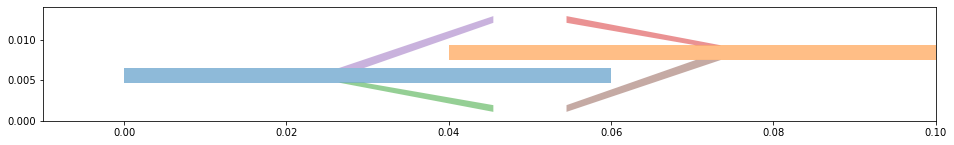

In [143]:
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(111)
ax.set_xlim(-0.01, X1)
ax.set_ylim(0, P_y)

plt.gca().set_aspect('equal', adjustable='box')



X1 = 100E-3 # 試験片長さ
# Y1	=	25E-3
Z1 = 5E-3
P_y = 14E-3 # PLAのy幅

E_y = 12E-3 # Epoxyのy幅
E_z = 3E-3 # Epoxyのz幅

CF_lap = 20E-3 # CFRPの重ね継ぎ手長さ
CF_len = (X1 + CF_lap) / 2 # CFRP1本あたりの長さ
CF_y = 1.8E-3 # CFRPの高さ
CF_z = CF_y # CFRPの幅
CF_gap = 1.0E-3 # CFRP間の距離
Y4 = P_y/2 - CF_gap/2 - CF_z #CFRP1の初期位置
Y5 = P_y/2 + CF_gap/2 #CFRP2の初期位置

K_sita_do = 15 #角度
K_sita = K_sita_do / (1/3.141592) / 180
K_x = ((P_y-CF_y)/2 - (P_y-E_y)/2) / math.tan(K_sita) # CFRP傘部分長さ
K_h = 0.8E-3 # CFRPの傘の幅
K_a = K_h/math.sin(K_sita) #CFRP傘の角度θの幅
K_b = K_h/math.cos(K_sita) #CFRP傘の角度θの幅2

K_s = X1 - CF_len - ((CF_gap + CF_y) / math.tan(K_sita)) - (K_h / math.sin(K_sita))
alpha = 0.1E-3


x_cfrp = [0, 0, CF_len, CF_len]
y_cfrp= [Y4, Y4+CF_y, Y4+CF_y, Y4]

x_naname1 = [K_s, K_a + K_s, K_x + K_s, K_x + K_s]
y_naname1 = [Y4, Y4, (P_y - E_y)/2 + K_b + alpha, (P_y - E_y)/2 + alpha]

x_naname2 = [K_s, K_x + K_s, K_x + K_s, K_a + K_s]
y_naname2 = [Y4 + CF_y, P_y - (P_y - E_y)/2 - alpha, P_y - (P_y - E_y)/2 - K_b - alpha, Y4 + CF_y]

x_list_list = [x_cfrp, x_naname1, x_naname2]
y_list_list = [y_cfrp, y_naname1, y_naname2]


plot_fill(ax, x_list_list, y_list_list)

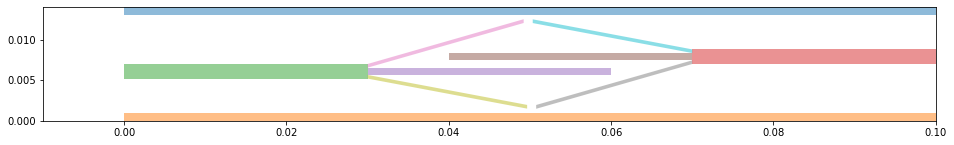

In [219]:
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(111)
ax.set_xlim(-0.01, X1)
ax.set_ylim(0, P_y)

plt.gca().set_aspect('equal', adjustable='box')



X1 = 100E-3 # 試験片長さ
# Y1	=	25E-3
Z1 = 5E-3
P_y = 14E-3 # PLAのy幅

E_y = 12E-3 # Epoxyのy幅
E_z = 3E-3 # Epoxyのz幅

CF_lap = 20E-3 # CFRPの重ね継ぎ手長さ
CF_len = (X1 + CF_lap) / 2 # CFRP1本あたりの長さ
CF_y = 1.8E-3 # CFRPの高さ
CF_z = CF_y # CFRPの幅
CF_gap = 0E-3 # CFRP間の距離
Y4 = P_y/2 - CF_gap/2 - CF_z #CFRP1の初期位置
Y5 = P_y/2 + CF_gap/2 #CFRP2の初期位置


ch_dis = 10E-3 # cfrpが細くなってから継ぎ手部分を差し引いた距離
L_naname = 20E-3 # cfrpの斜め繊維の長さ
alpha = 0.5E-3 # plaと斜め繊維先端のy方向距離
X_hoso_fir = CF_len - CF_lap - ch_dis # 細いcfrpのx座標
H_cf_hoso = CF_y * 0.5 #. 細いcfrpの幅
H_cf_naname = (CF_y-H_cf_hoso)/2 # 斜め方向cfrpの幅
# cfrp斜め繊維1つ目
sita1 = math.asin((((P_y+E_y)/2-(Y4+CF_y))-alpha)/L_naname)
X_naname_top1 = L_naname * math.cos(sita1) + X_hoso_fir
Y_naname_top1 = L_naname * math.sin(sita1) + Y4+H_cf_naname+H_cf_hoso
# cfrp斜め繊維２つ目
sita2 = math.asin((Y4-(P_y-E_y)/2-alpha)/L_naname)
X_naname_top2 = L_naname * math.cos(sita2) + X_hoso_fir
Y_naname_top2 = Y4 - L_naname * math.sin(sita2)



## pla
x_pla = [0, 0, X1, X1]
y_pla = [(P_y+E_y)/2, P_y, P_y, (P_y+E_y)/2]
##

x_cfrp = [0, 0, X_hoso_fir, X_hoso_fir]
y_cfrp= [Y4, Y4+CF_y, Y4+CF_y, Y4]

x_cfrp_hoso = [X_hoso_fir, X_hoso_fir, CF_len, CF_len]
y_cfrp_hoso= [Y4+H_cf_naname, Y4+H_cf_naname+H_cf_hoso, Y4+H_cf_naname+H_cf_hoso, Y4+H_cf_naname]

x_cfrp_naname1 = [X_hoso_fir, X_hoso_fir, X_naname_top1, X_naname_top1]
y_cfrp_naname1= [Y4+H_cf_naname+H_cf_hoso, Y4+CF_y, Y_naname_top1+H_cf_naname/math.cos(sita1), Y_naname_top1]

x_cfrp_naname2 = [X_hoso_fir, X_hoso_fir, X_naname_top2, X_naname_top2]
y_cfrp_naname2= [Y4, Y4+H_cf_naname, Y_naname_top2+H_cf_naname/math.cos(sita2), Y_naname_top2]

# print(math.sqrt((X_naname_top1-X_hoso_fir)**2+(Y_naname_top1+H_cf_naname/math.cos(sita1)-(Y4+CF_y))**2))
# print(math.sqrt((X_naname_top2-X_hoso_fir)**2+(Y_naname_top2+H_cf_naname/math.cos(sita2)-(Y4+H_cf_naname))**2))

x_list_list = [x_pla, x_cfrp, x_cfrp_hoso, x_cfrp_naname1, x_cfrp_naname2]
y_list_list = [y_pla, y_cfrp, y_cfrp_hoso, y_cfrp_naname1, y_cfrp_naname2]


plot_fill(ax, x_list_list, y_list_list)

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.01，　幅：0.2


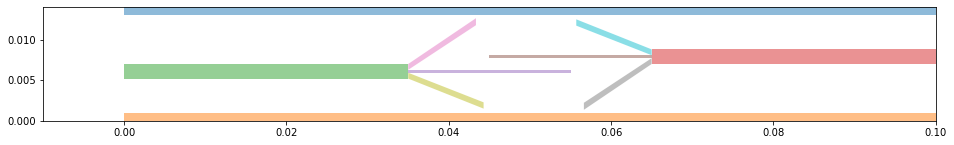

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.01，　幅：0.333


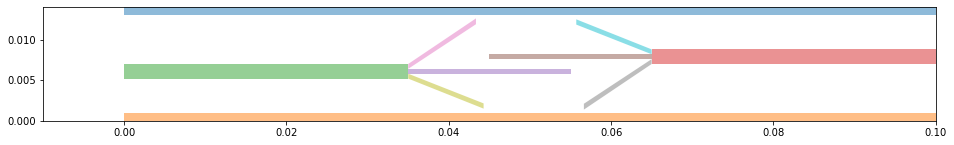

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.01，　幅：0.5


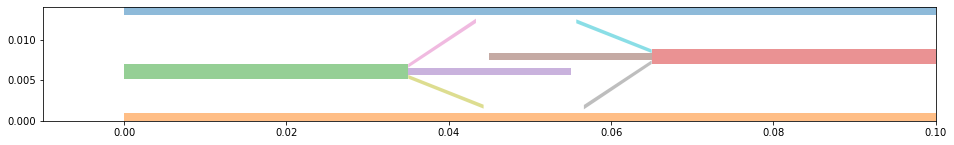

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.02，　幅：0.2


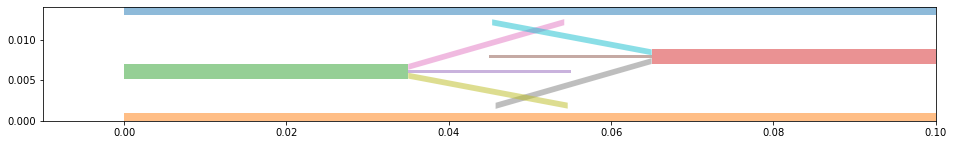

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.02，　幅：0.333


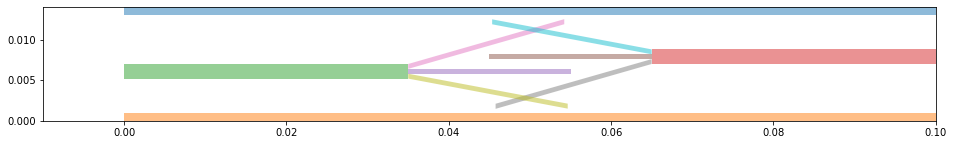

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.02，　幅：0.5


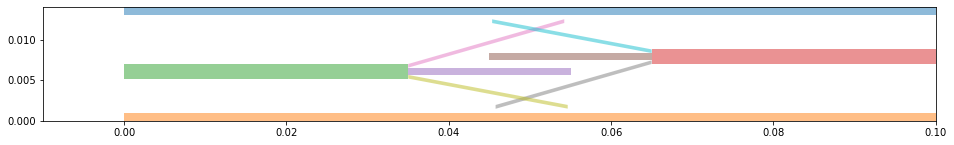

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.03，　幅：0.2


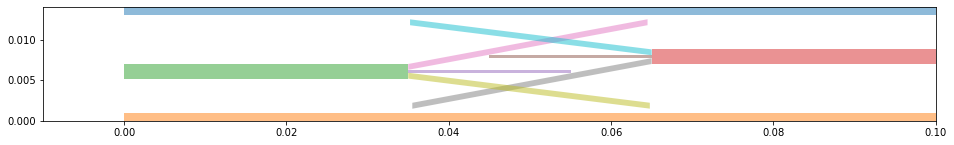

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.03，　幅：0.333


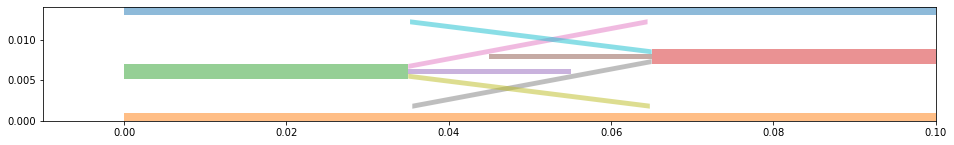

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.03，　幅：0.5


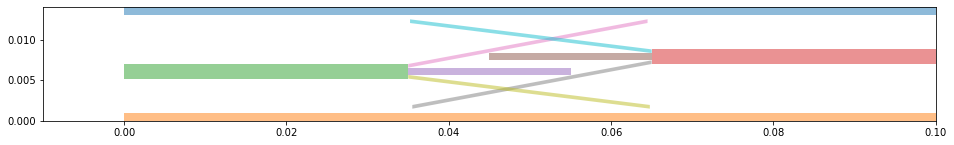

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.01，　幅：0.2


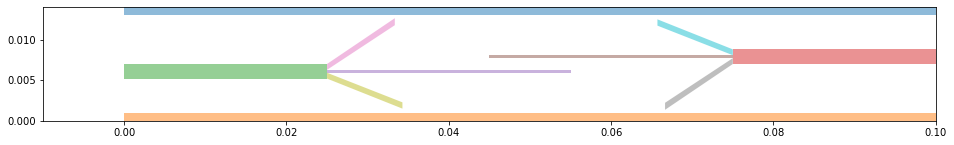

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.01，　幅：0.333


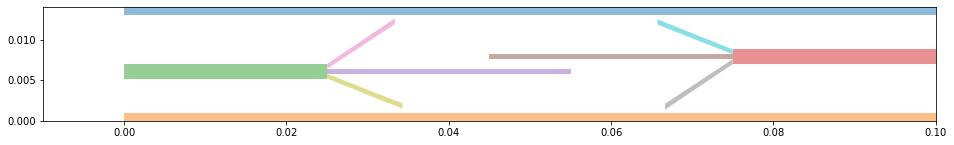

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.01，　幅：0.5


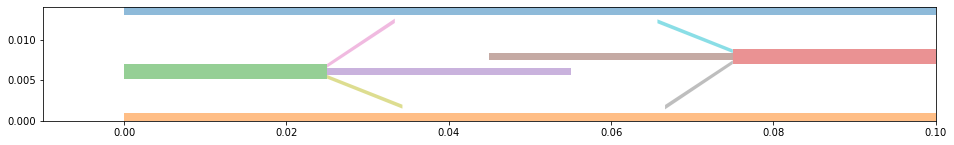

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.02，　幅：0.2


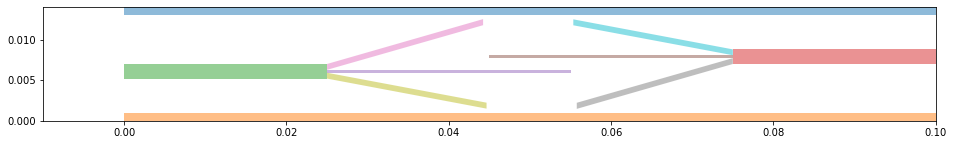

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.02，　幅：0.333


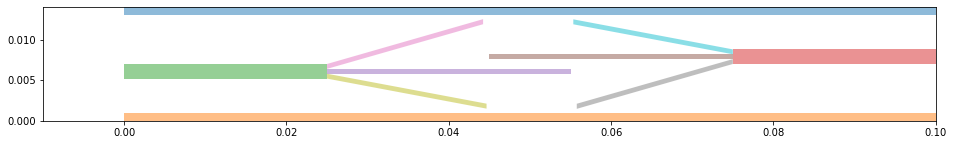

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.02，　幅：0.5


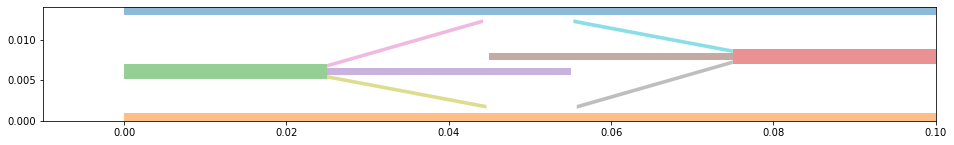

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.03，　幅：0.2


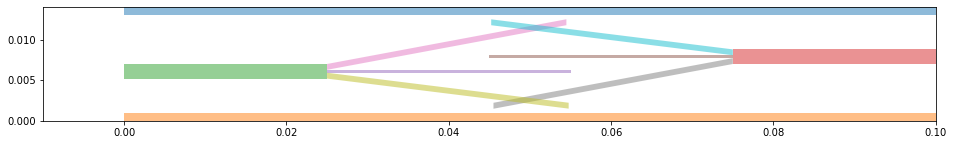

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.03，　幅：0.333


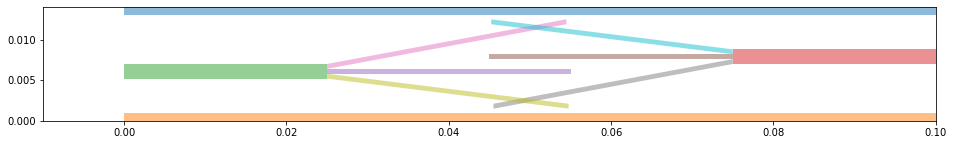

継ぎ手長さ：0.01，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.03，　幅：0.5


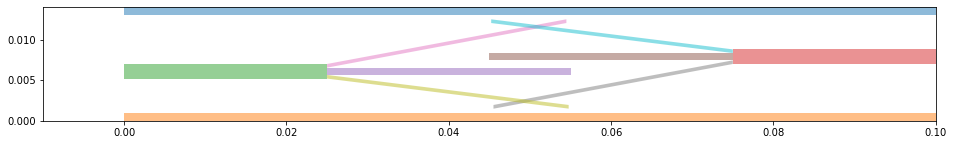

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.01，　幅：0.2


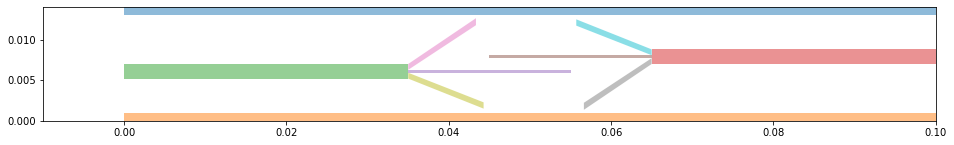

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.01，　幅：0.333


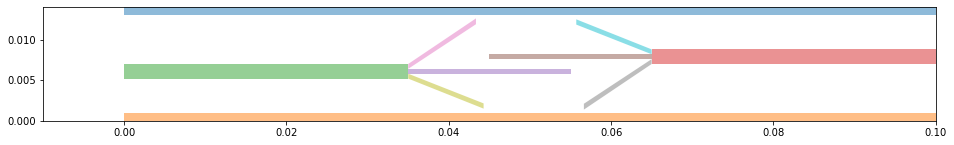

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.01，　幅：0.5


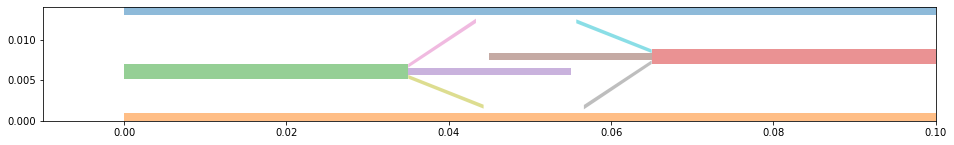

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.02，　幅：0.2


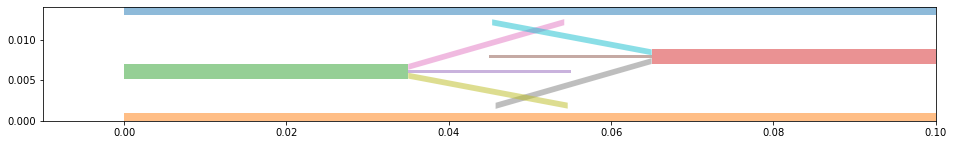

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.02，　幅：0.333


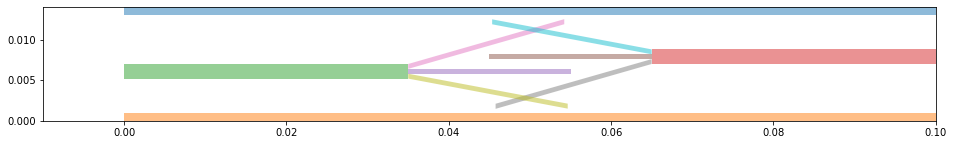

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.02，　幅：0.5


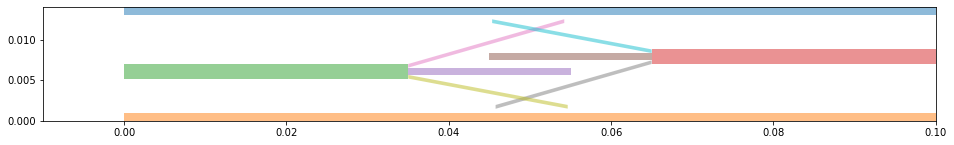

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.03，　幅：0.2


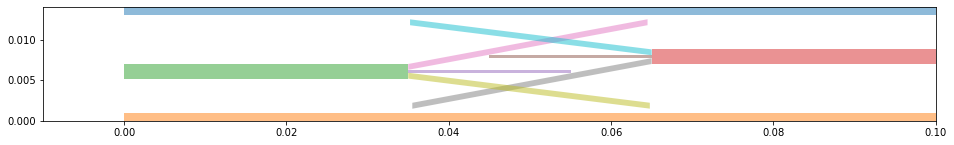

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.03，　幅：0.333


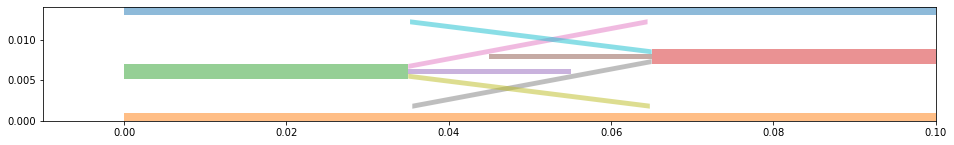

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.03，　幅：0.5


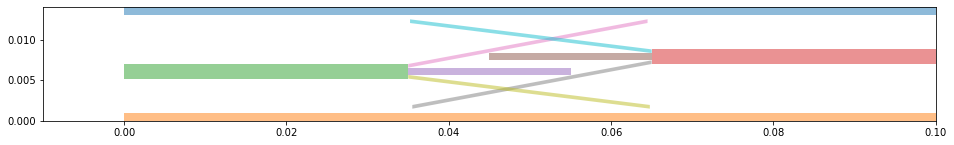

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.01，　幅：0.2


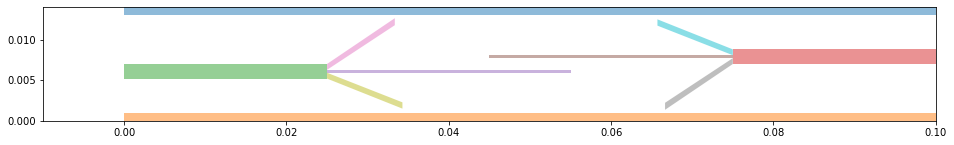

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.01，　幅：0.333


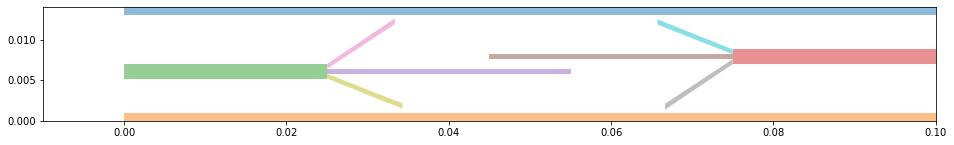

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.01，　幅：0.5


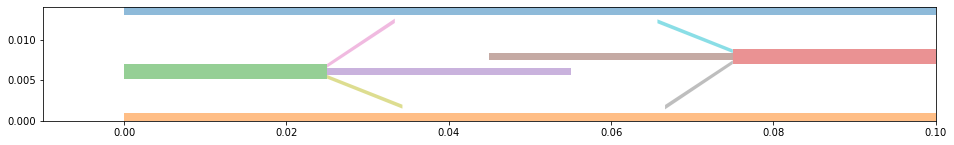

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.02，　幅：0.2


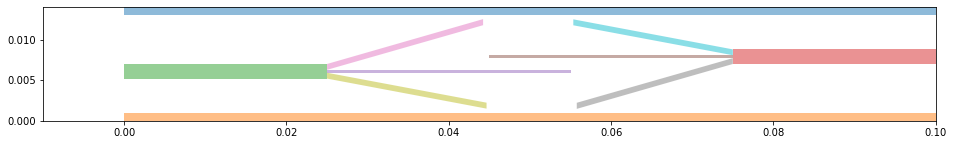

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.02，　幅：0.333


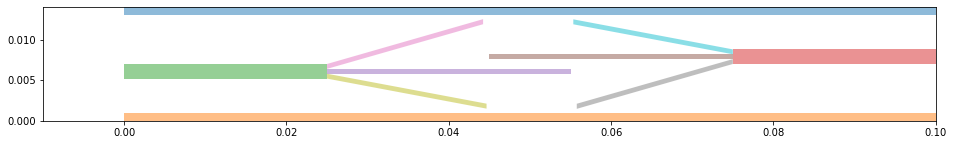

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.02，　幅：0.5


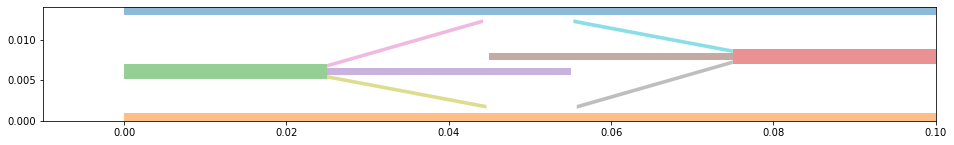

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.03，　幅：0.2


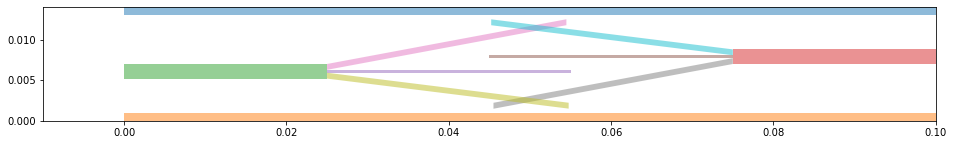

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.03，　幅：0.333


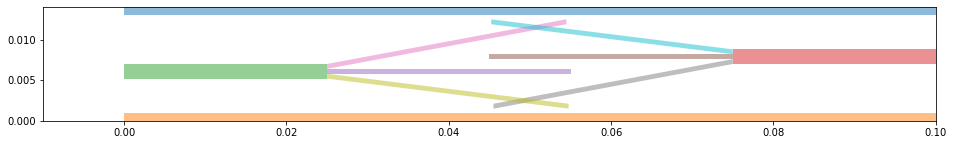

継ぎ手長さ：0.01，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.03，　幅：0.5


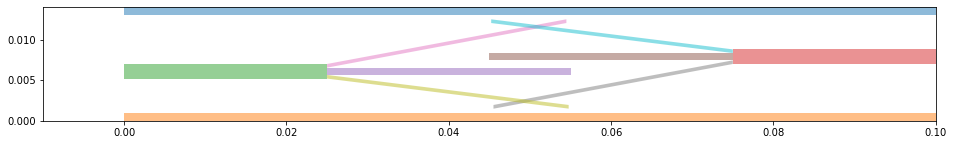

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.01，　幅：0.2


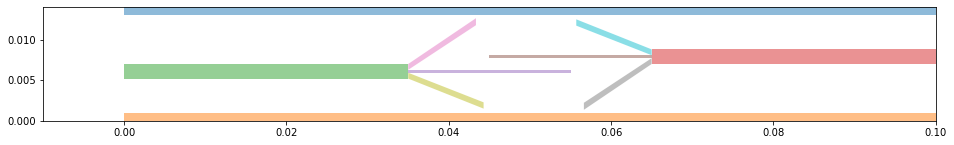

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.01，　幅：0.333


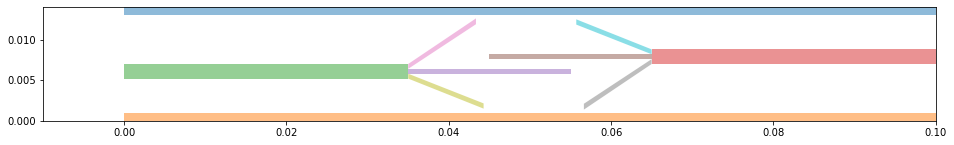

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.01，　幅：0.5


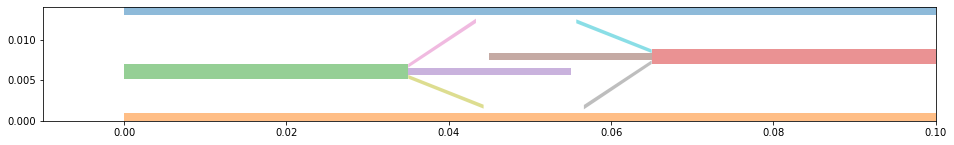

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.02，　幅：0.2


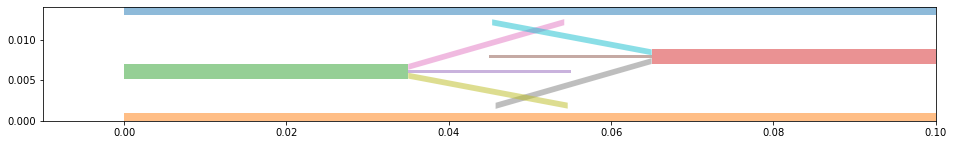

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.02，　幅：0.333


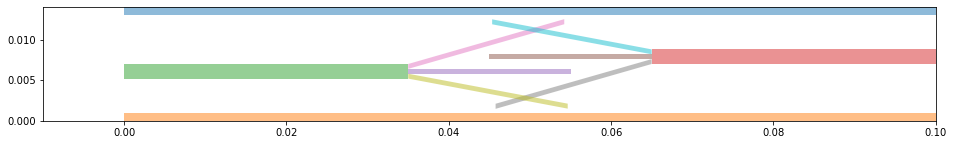

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.02，　幅：0.5


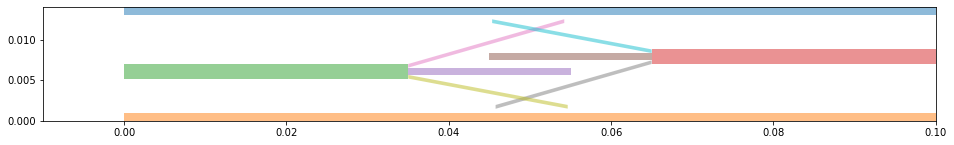

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.03，　幅：0.2


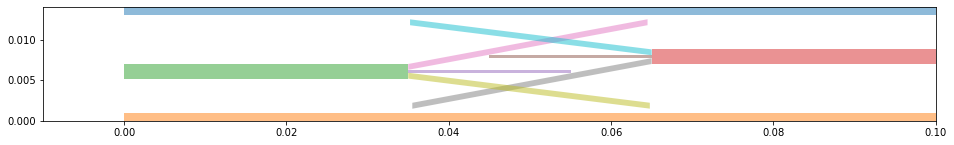

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.03，　幅：0.333


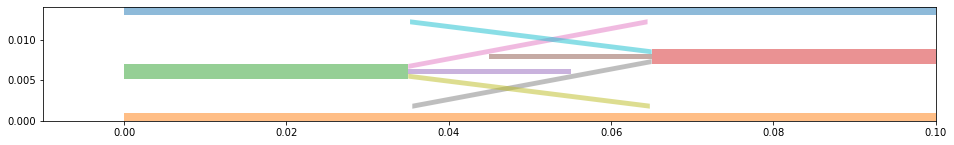

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.03，　幅：0.5


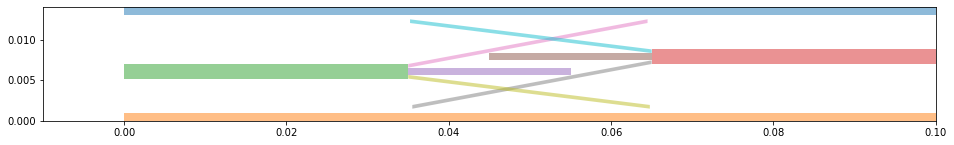

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.01，　幅：0.2


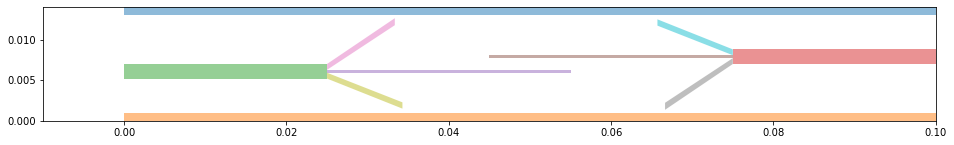

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.01，　幅：0.333


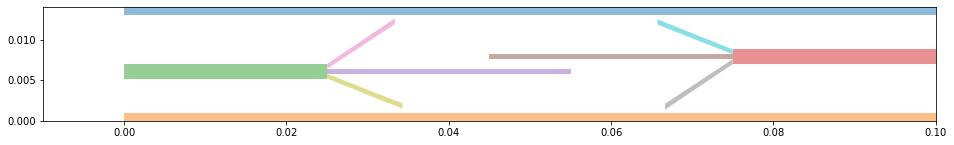

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.01，　幅：0.5


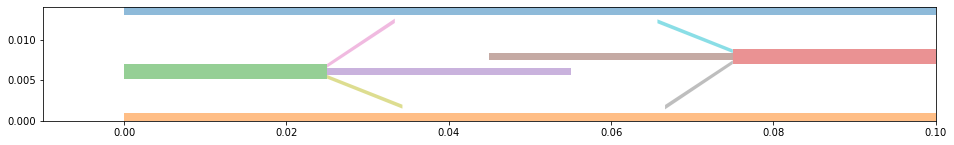

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.02，　幅：0.2


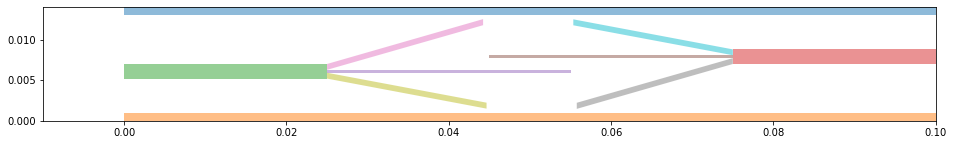

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.02，　幅：0.333


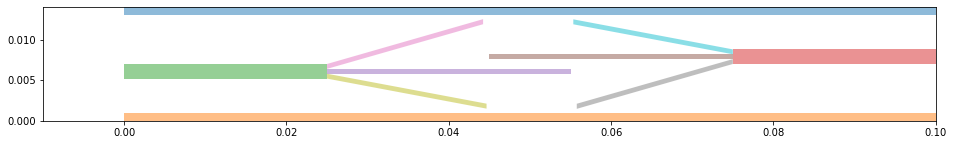

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.02，　幅：0.5


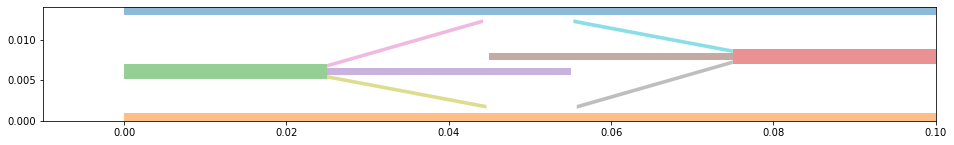

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.03，　幅：0.2


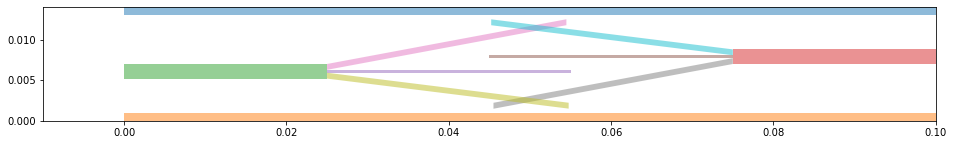

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.03，　幅：0.333


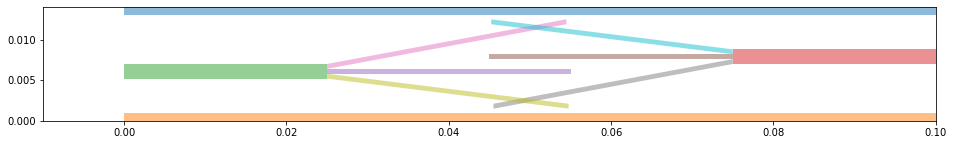

継ぎ手長さ：0.01，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.03，　幅：0.5


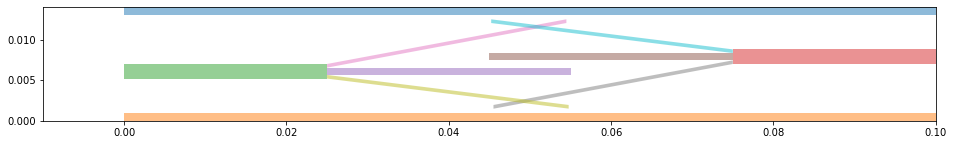

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.01，　幅：0.2


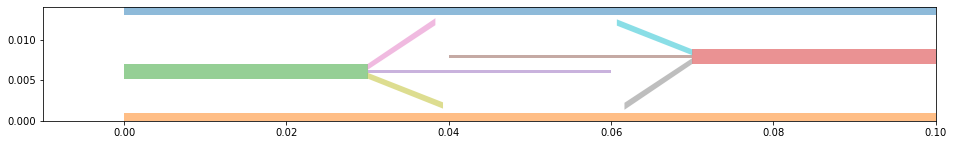

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.01，　幅：0.333


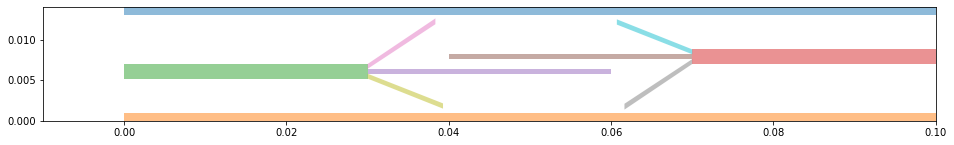

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.01，　幅：0.5


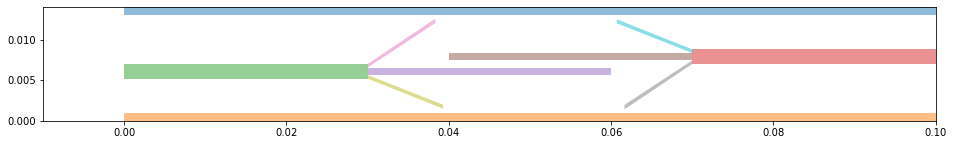

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.02，　幅：0.2


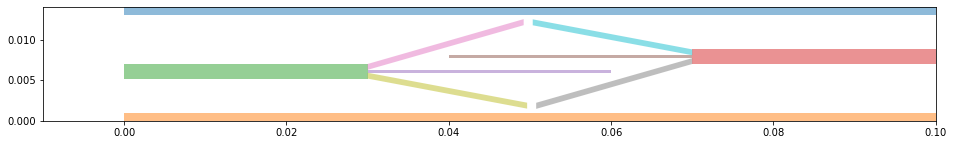

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.02，　幅：0.333


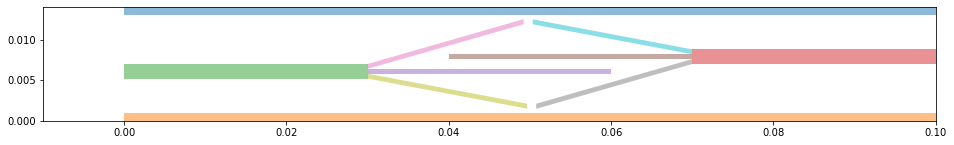

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.02，　幅：0.5


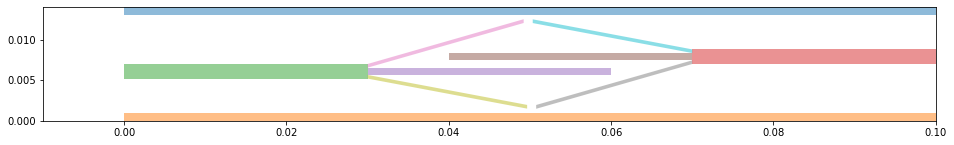

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.03，　幅：0.2


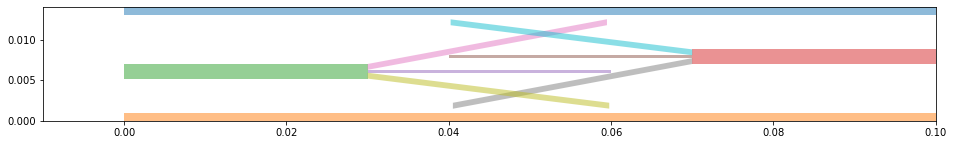

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.03，　幅：0.333


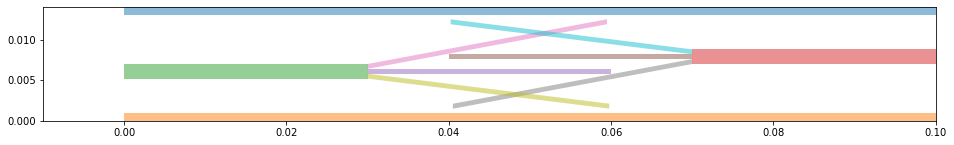

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.03，　幅：0.5


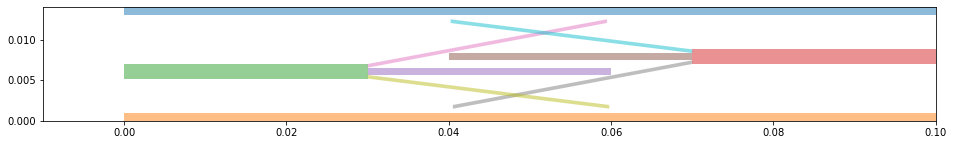

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.01，　幅：0.2


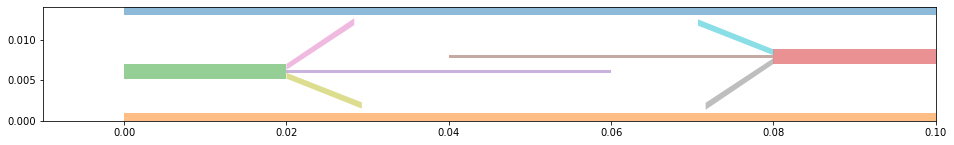

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.01，　幅：0.333


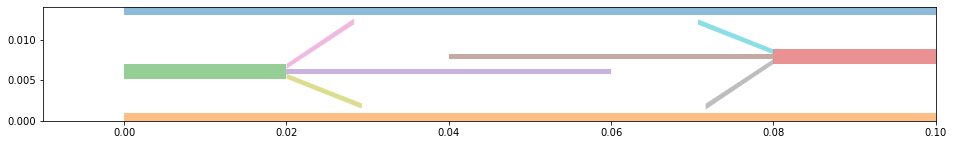

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.01，　幅：0.5


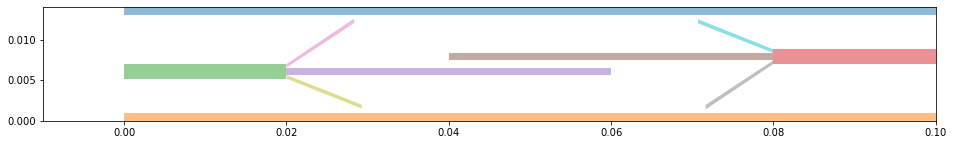

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.02，　幅：0.2


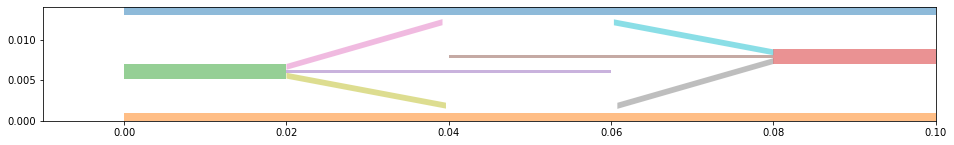

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.02，　幅：0.333


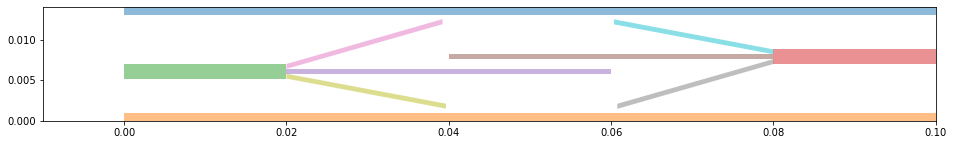

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.02，　幅：0.5


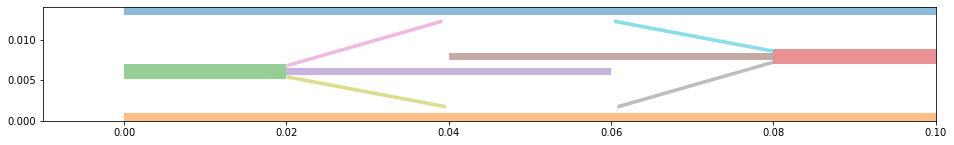

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.03，　幅：0.2


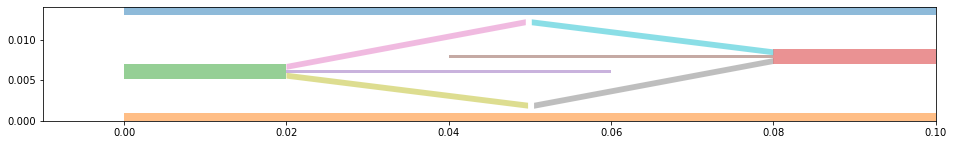

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.03，　幅：0.333


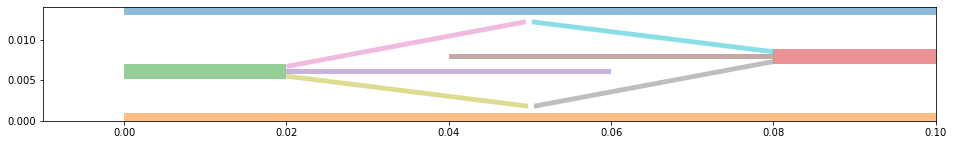

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.03，　幅：0.5


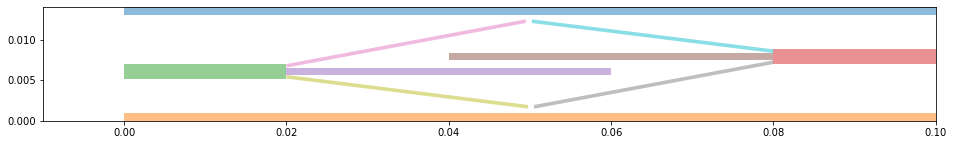

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.01，　幅：0.2


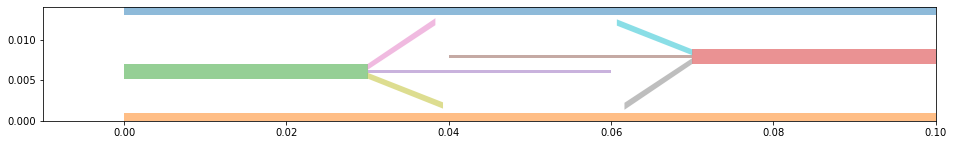

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.01，　幅：0.333


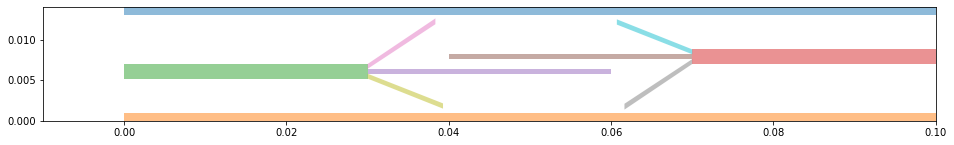

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.01，　幅：0.5


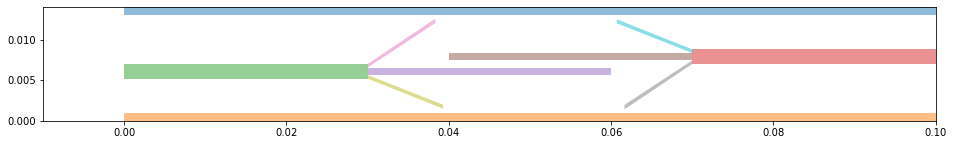

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.02，　幅：0.2


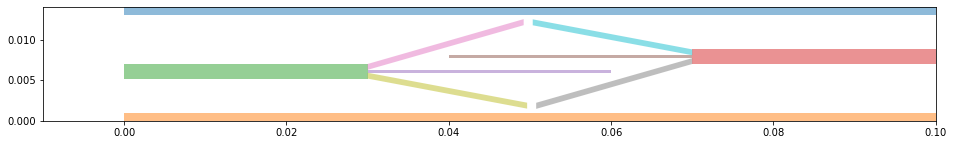

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.02，　幅：0.333


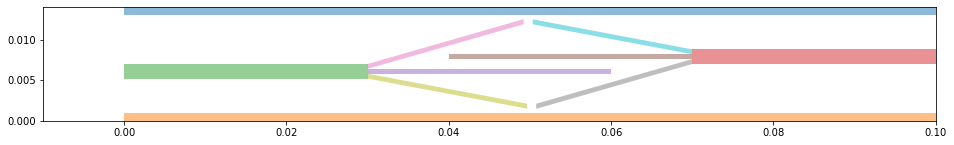

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.02，　幅：0.5


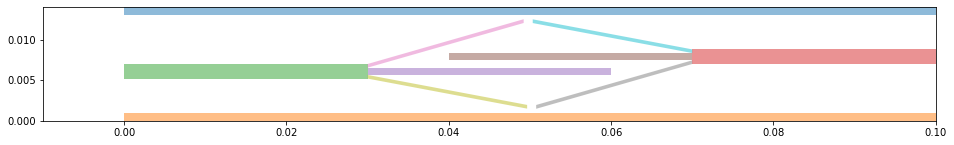

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.03，　幅：0.2


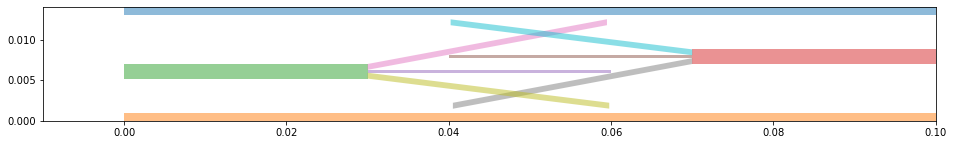

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.03，　幅：0.333


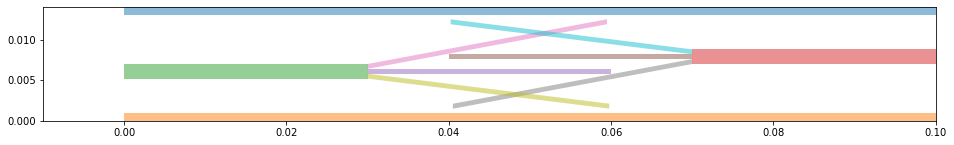

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.03，　幅：0.5


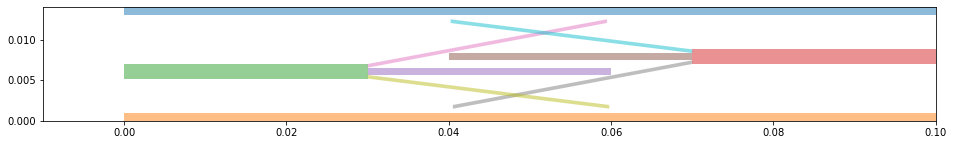

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.01，　幅：0.2


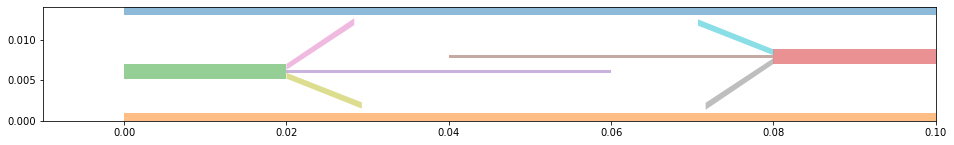

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.01，　幅：0.333


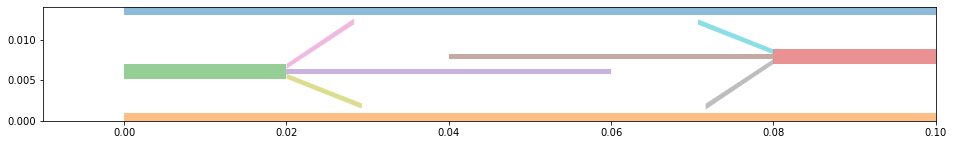

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.01，　幅：0.5


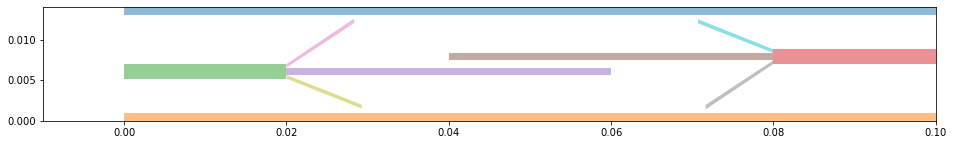

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.02，　幅：0.2


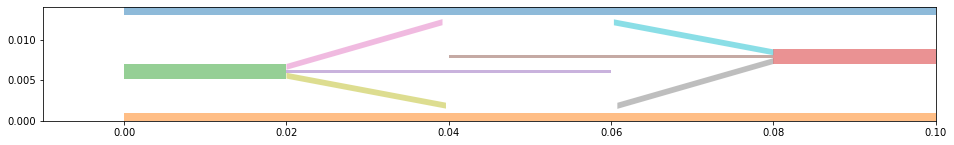

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.02，　幅：0.333


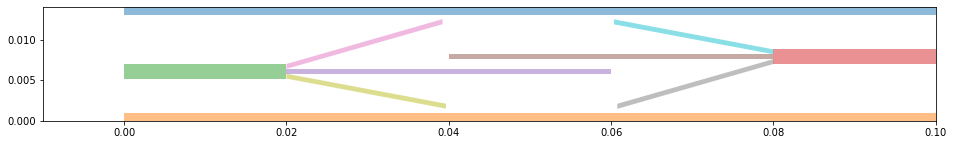

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.02，　幅：0.5


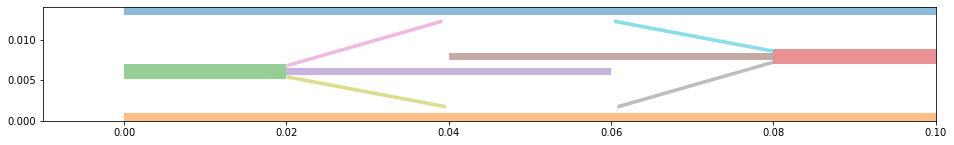

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.03，　幅：0.2


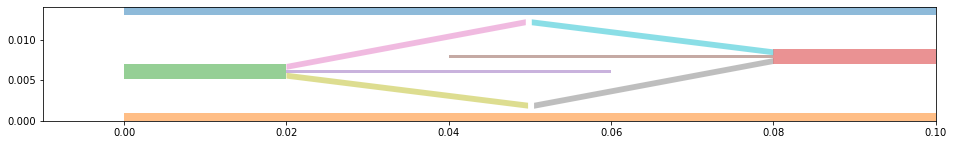

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.03，　幅：0.333


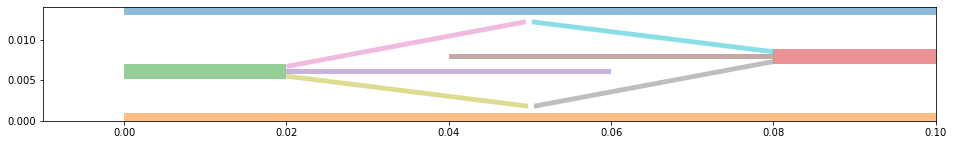

継ぎ手長さ：0.02，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.03，　幅：0.5


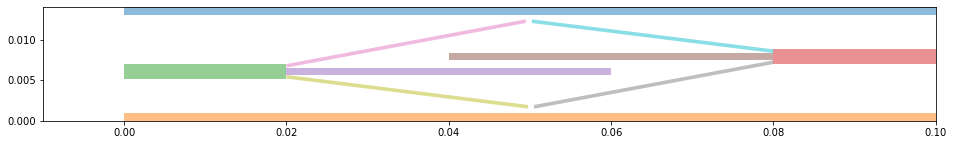

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.01，　幅：0.2


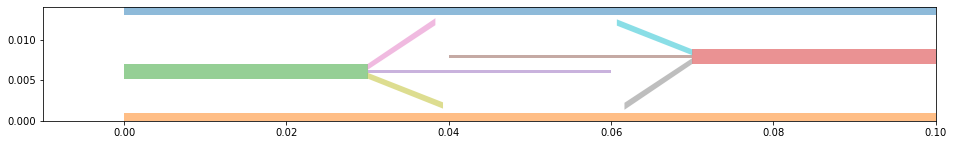

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.01，　幅：0.333


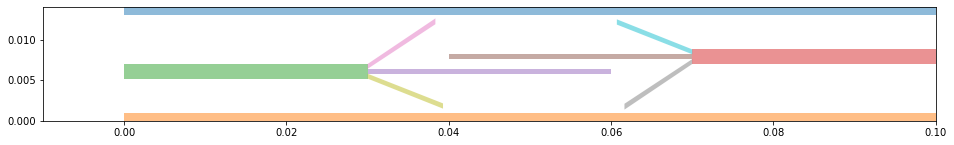

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.01，　幅：0.5


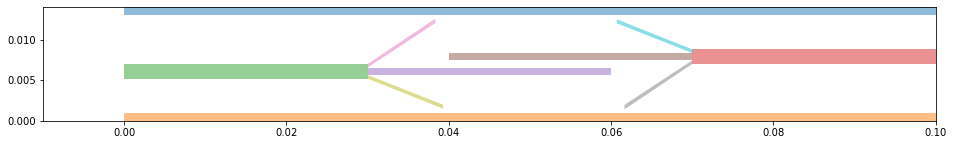

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.02，　幅：0.2


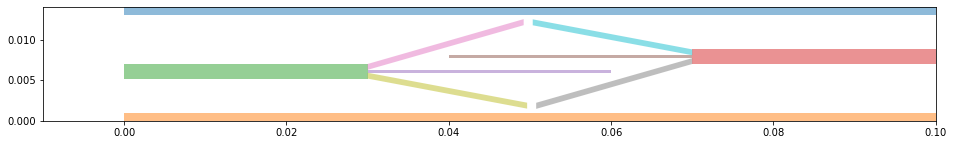

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.02，　幅：0.333


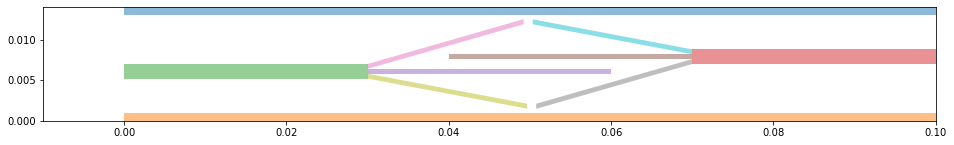

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.02，　幅：0.5


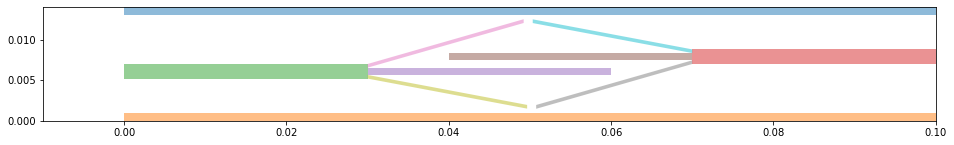

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.03，　幅：0.2


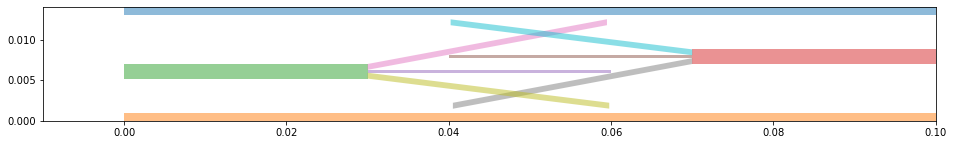

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.03，　幅：0.333


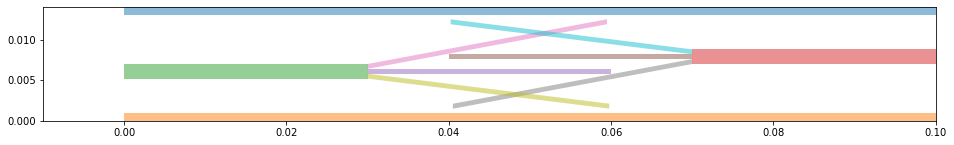

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.03，　幅：0.5


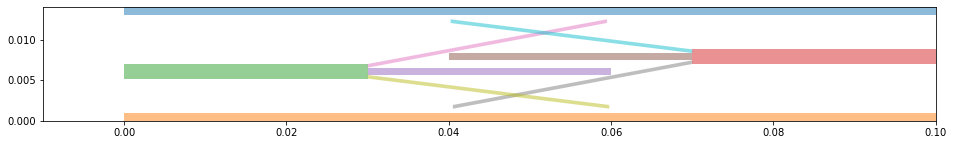

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.01，　幅：0.2


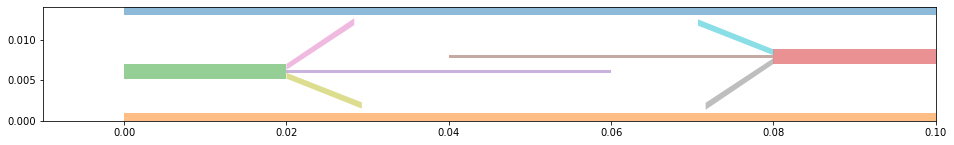

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.01，　幅：0.333


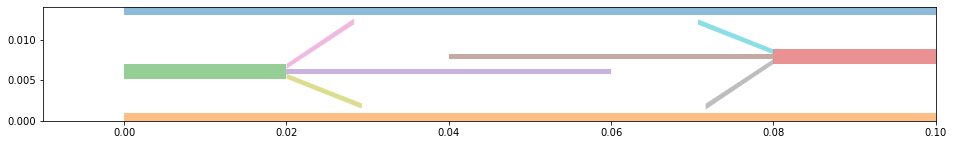

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.01，　幅：0.5


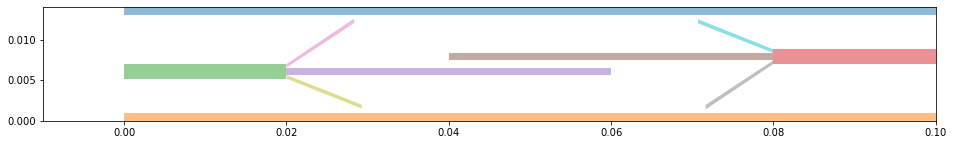

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.02，　幅：0.2


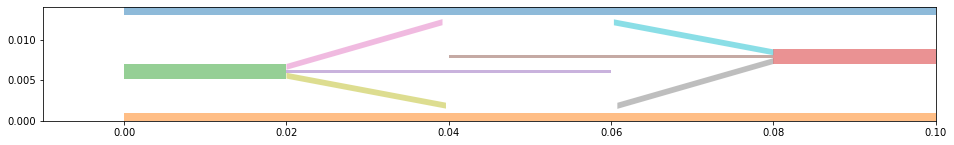

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.02，　幅：0.333


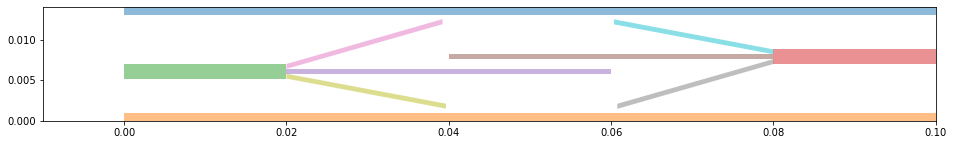

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.02，　幅：0.5


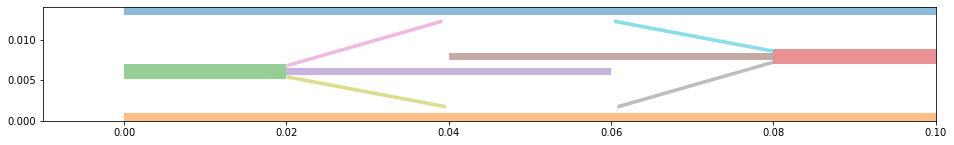

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.03，　幅：0.2


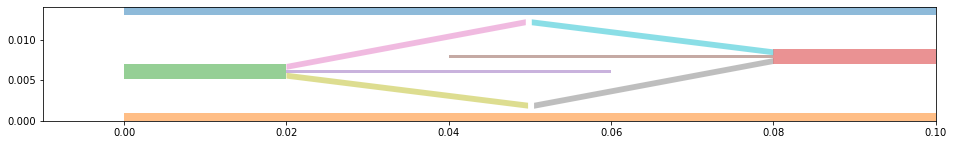

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.03，　幅：0.333


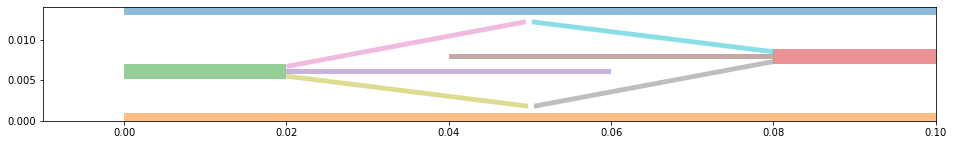

継ぎ手長さ：0.02，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.03，　幅：0.5


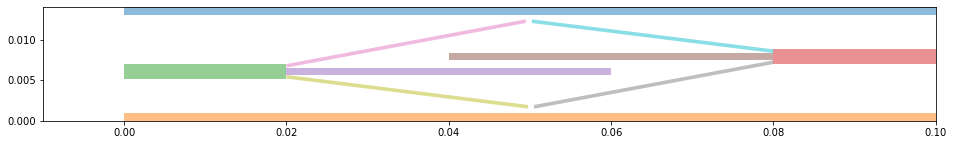

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.01，　幅：0.2


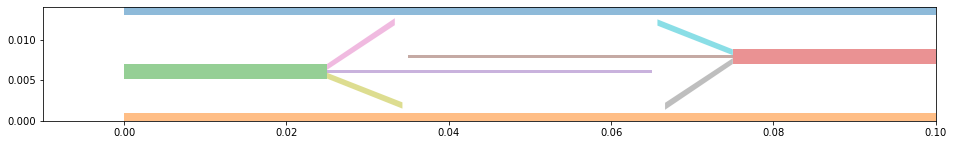

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.01，　幅：0.333


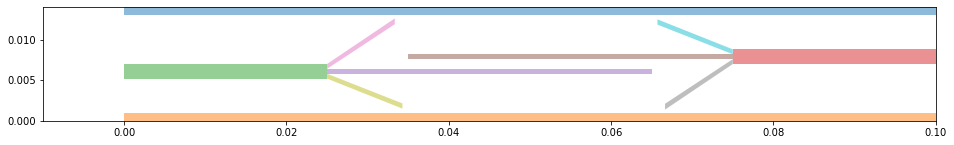

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.01，　幅：0.5


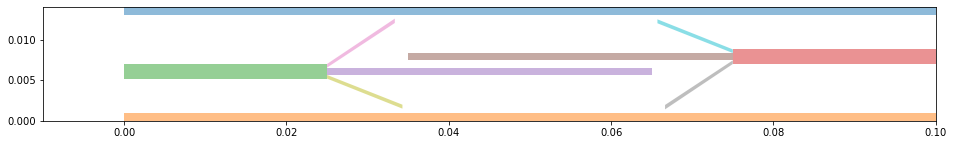

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.02，　幅：0.2


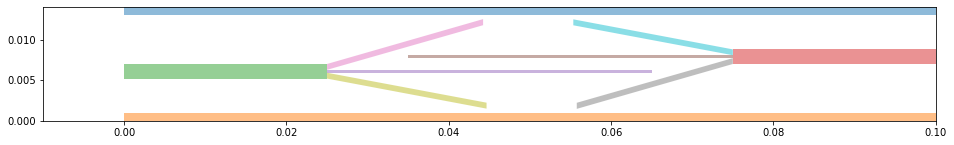

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.02，　幅：0.333


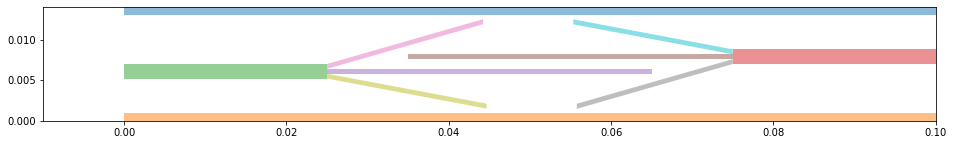

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.02，　幅：0.5


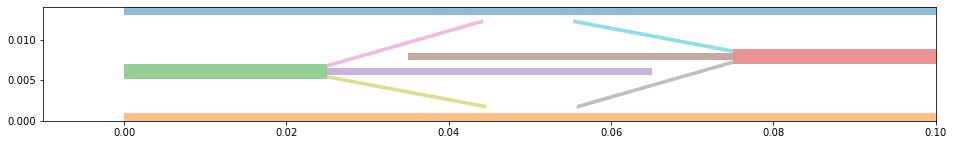

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.03，　幅：0.2


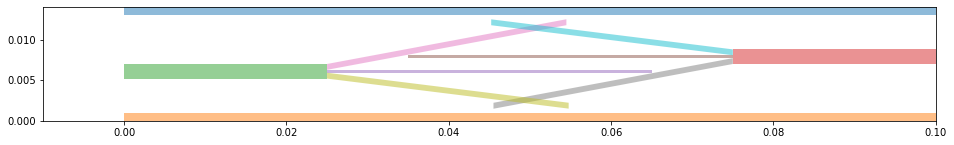

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.03，　幅：0.333


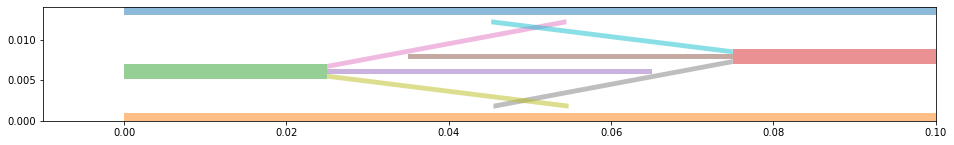

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.03，　幅：0.5


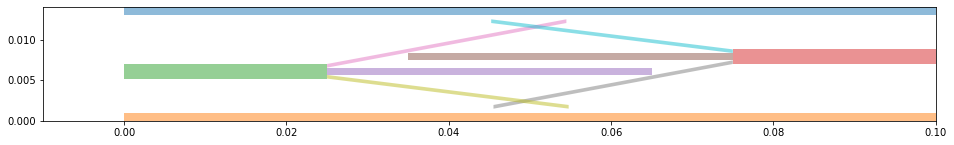

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.01，　幅：0.2


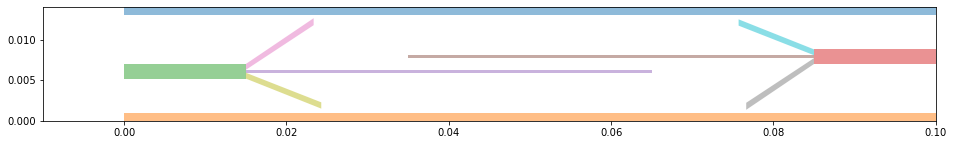

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.01，　幅：0.333


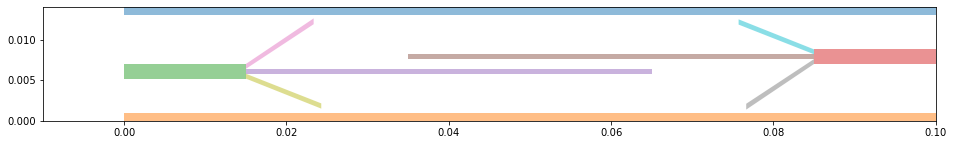

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.01，　幅：0.5


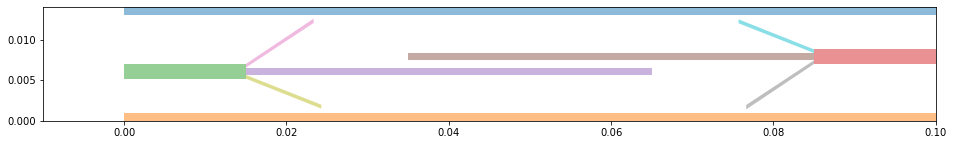

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.02，　幅：0.2


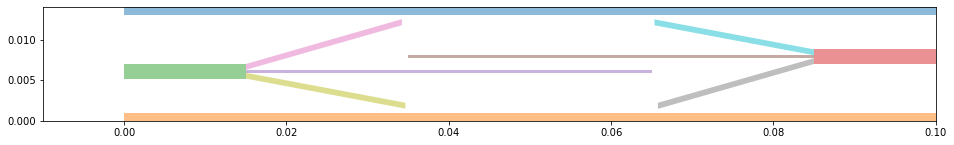

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.02，　幅：0.333


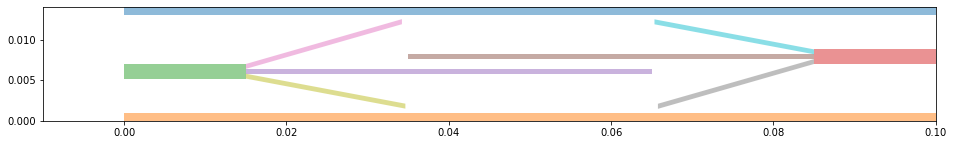

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.02，　幅：0.5


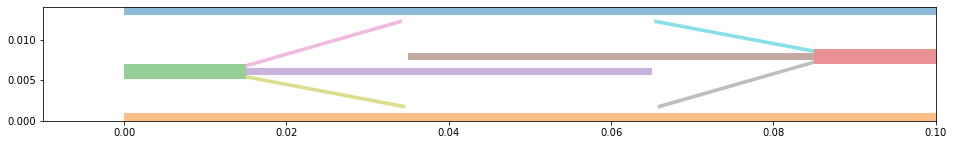

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.03，　幅：0.2


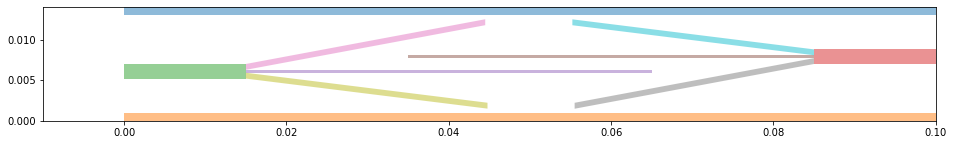

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.03，　幅：0.333


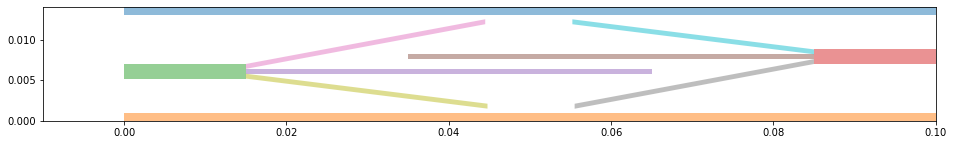

継ぎ手長さ：0.03，　cfrp間距離0.001，　ディス：0.02，　斜め長さ：0.03，　幅：0.5


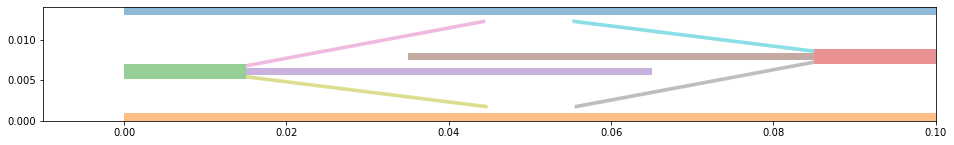

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.01，　幅：0.2


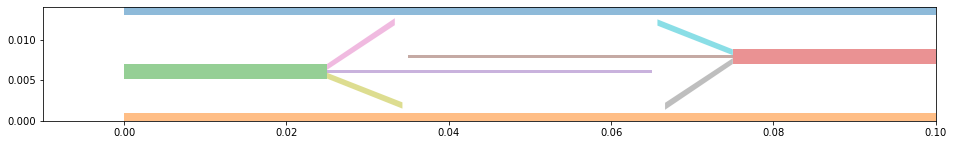

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.01，　幅：0.333


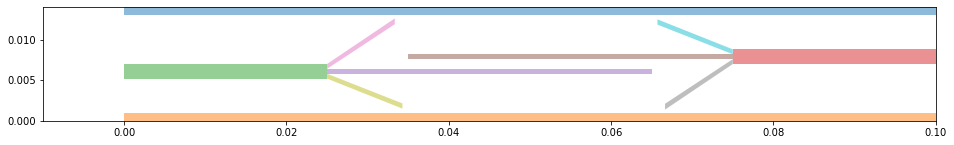

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.01，　幅：0.5


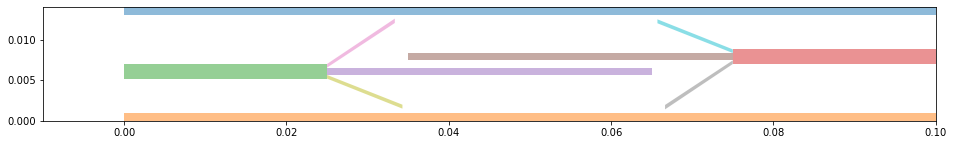

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.02，　幅：0.2


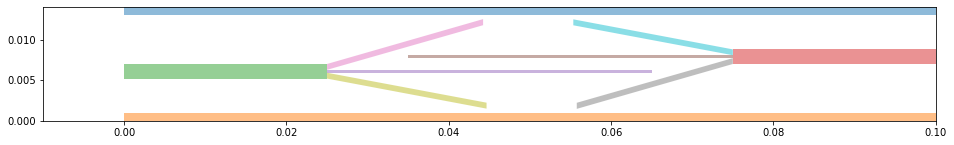

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.02，　幅：0.333


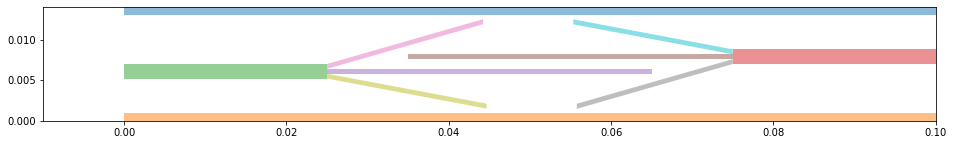

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.02，　幅：0.5


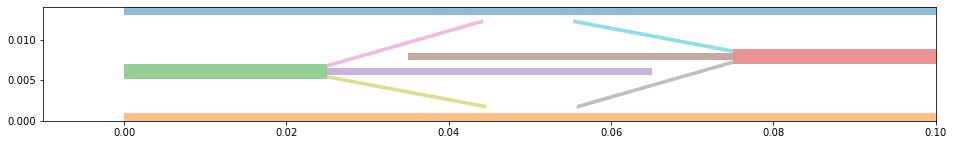

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.03，　幅：0.2


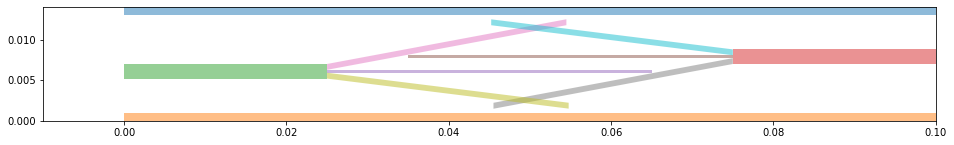

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.03，　幅：0.333


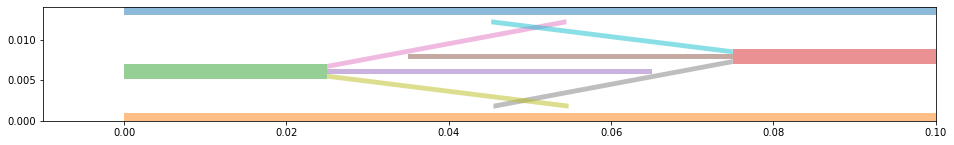

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.01，　斜め長さ：0.03，　幅：0.5


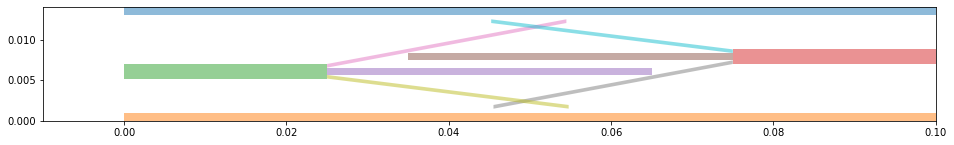

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.01，　幅：0.2


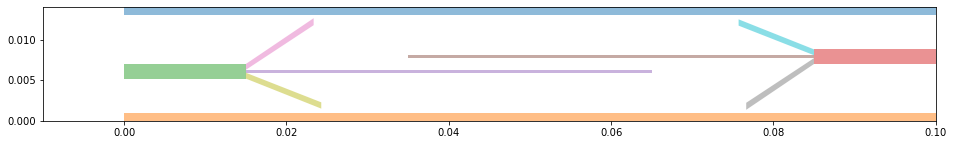

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.01，　幅：0.333


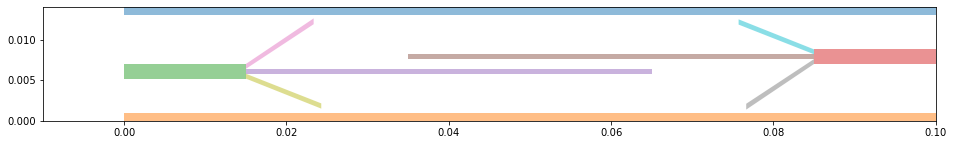

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.01，　幅：0.5


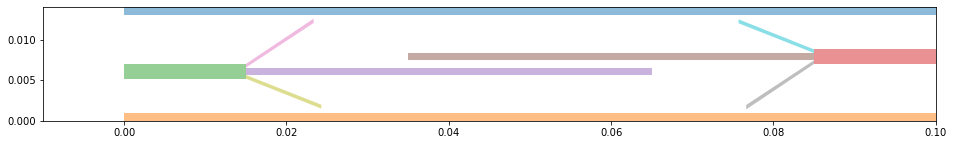

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.02，　幅：0.2


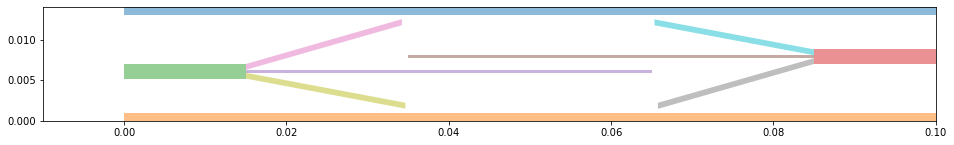

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.02，　幅：0.333


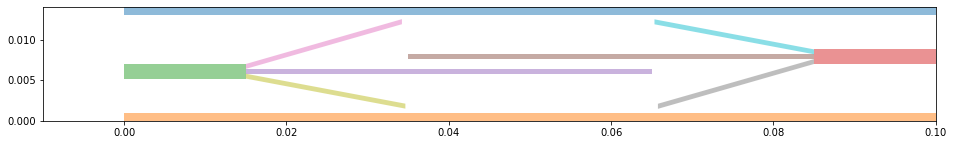

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.02，　幅：0.5


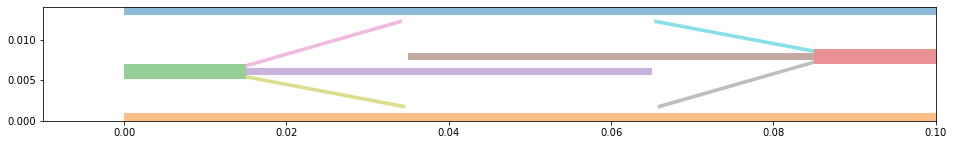

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.03，　幅：0.2


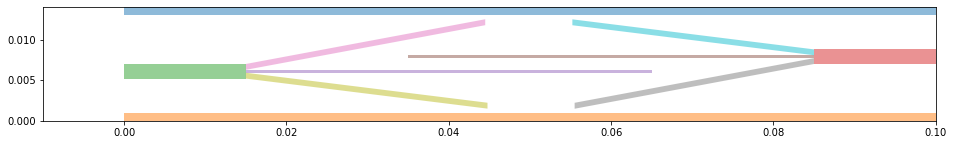

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.03，　幅：0.333


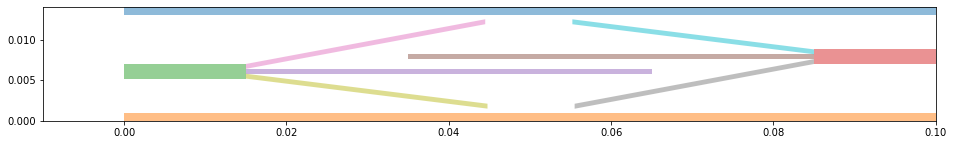

継ぎ手長さ：0.03，　cfrp間距離0.002，　ディス：0.02，　斜め長さ：0.03，　幅：0.5


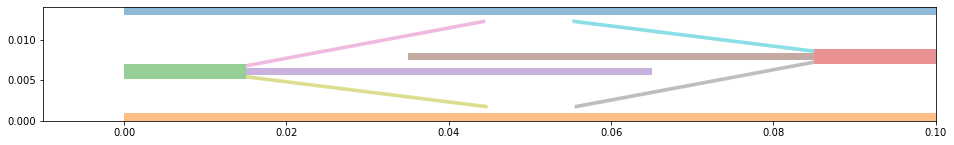

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.01，　幅：0.2


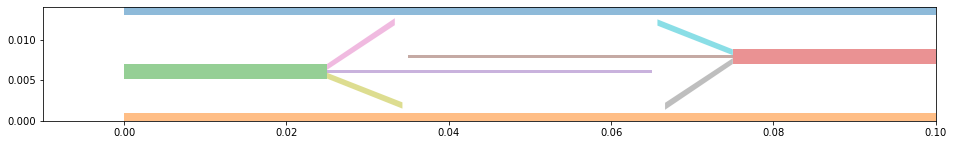

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.01，　幅：0.333


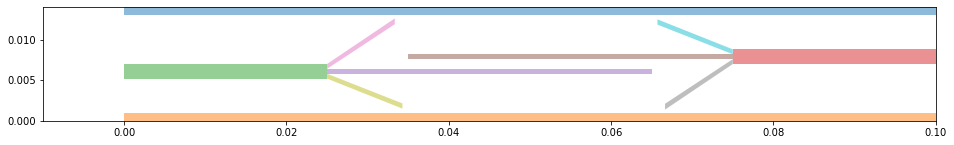

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.01，　幅：0.5


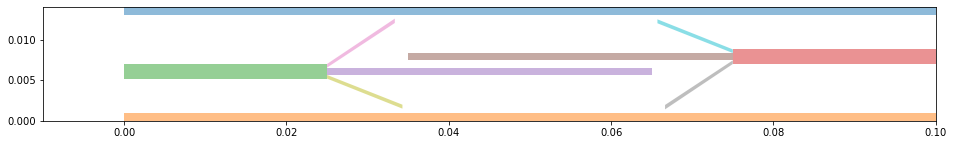

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.02，　幅：0.2


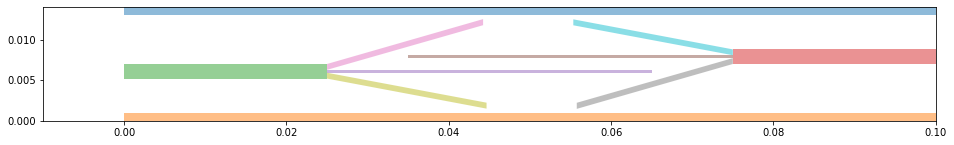

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.02，　幅：0.333


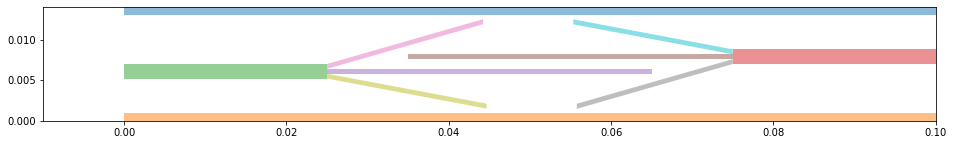

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.02，　幅：0.5


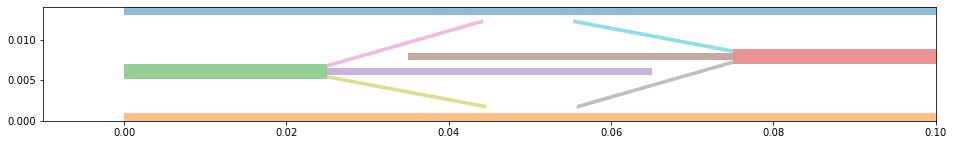

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.03，　幅：0.2


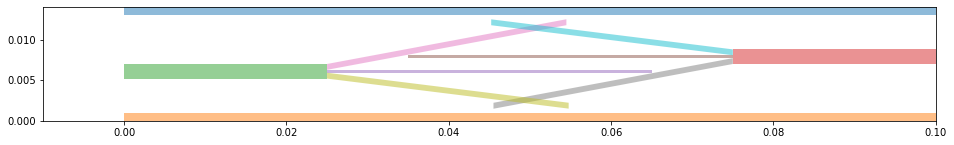

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.03，　幅：0.333


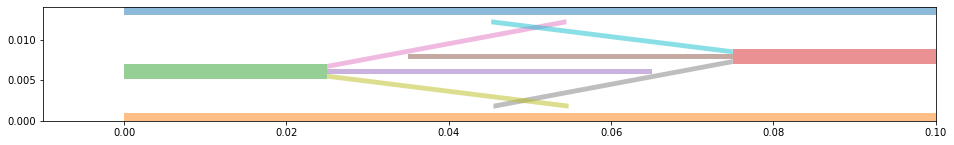

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.01，　斜め長さ：0.03，　幅：0.5


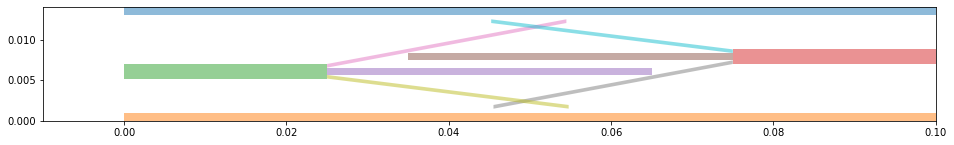

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.01，　幅：0.2


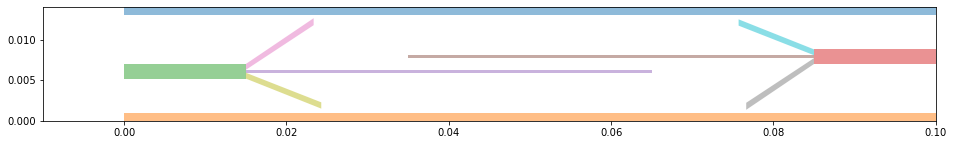

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.01，　幅：0.333


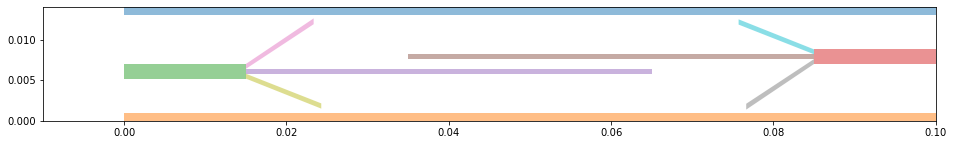

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.01，　幅：0.5


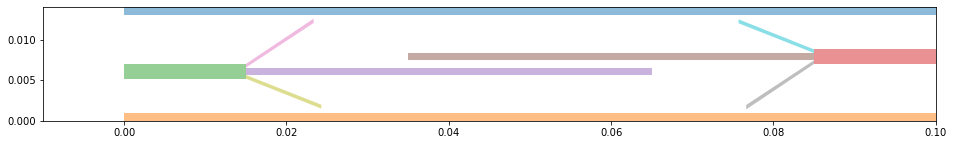

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.02，　幅：0.2


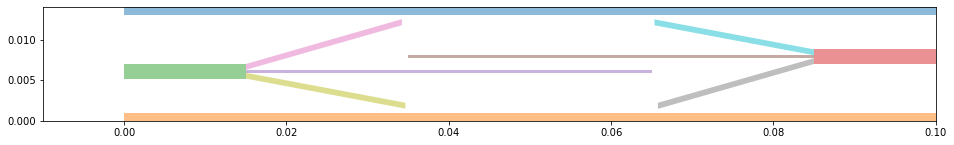

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.02，　幅：0.333


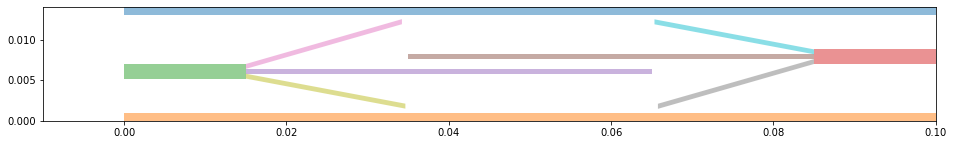

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.02，　幅：0.5


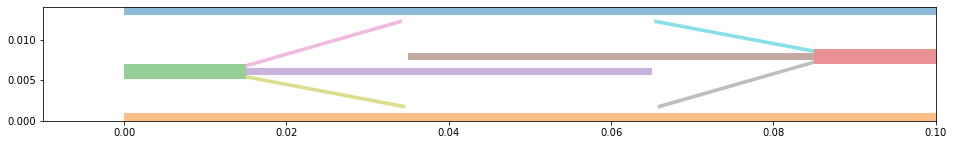

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.03，　幅：0.2


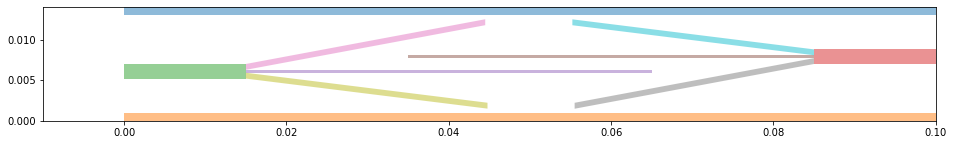

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.03，　幅：0.333


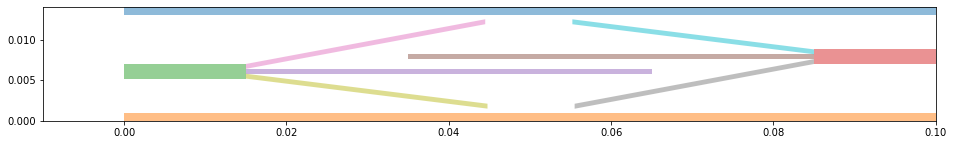

継ぎ手長さ：0.03，　cfrp間距離0.003，　ディス：0.02，　斜め長さ：0.03，　幅：0.5


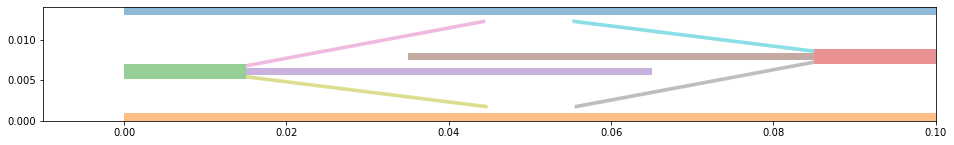

In [226]:
lap_list = [10E-3, 20E-3, 30E-3]
gap_list = [1E-3, 2E-3, 3E-3]
dis_list = [10E-3, 20E-3]
naname_list = [10E-3, 20E-3, 30E-3]
haba_list = [0.2, 0.333, 0.5]

for lap in lap_list:
    for gap in gap_list:
        for dis in dis_list:
            for naname in naname_list:
                for haba in haba_list:
                    
                    print("継ぎ手長さ：{}，　cfrp間距離{}，　ディス：{}，　斜め長さ：{}，　幅：{}".format(lap, gap, dis, naname, haba))
                    
                    fig = plt.figure(figsize=(16, 8))

                    ax = fig.add_subplot(111)
                    ax.set_xlim(-0.01, X1)
                    ax.set_ylim(0, P_y)

                    plt.gca().set_aspect('equal', adjustable='box')



                    X1 = 100E-3 # 試験片長さ
                    # Y1	=	25E-3
                    Z1 = 5E-3
                    P_y = 14E-3 # PLAのy幅

                    E_y = 12E-3 # Epoxyのy幅
                    E_z = 3E-3 # Epoxyのz幅

                    CF_lap = lap # CFRPの重ね継ぎ手長さ
                    CF_len = (X1 + CF_lap) / 2 # CFRP1本あたりの長さ
                    CF_y = 1.8E-3 # CFRPの高さ
                    CF_z = CF_y # CFRPの幅
                    CF_gap = 0E-3 # CFRP間の距離
                    Y4 = P_y/2 - CF_gap/2 - CF_z #CFRP1の初期位置
                    Y5 = P_y/2 + CF_gap/2 #CFRP2の初期位置


                    ch_dis = dis # cfrpが細くなってから継ぎ手部分を差し引いた距離
                    L_naname = naname # cfrpの斜め繊維の長さ
                    alpha = 0.5E-3 # plaと斜め繊維先端のy方向距離
                    X_hoso_fir = CF_len - CF_lap - ch_dis # 細いcfrpのx座標
                    H_cf_hoso = CF_y * haba #. 細いcfrpの幅
                    H_cf_naname = (CF_y-H_cf_hoso)/2 # 斜め方向cfrpの幅
                    # cfrp斜め繊維1つ目
                    sita1 = math.asin((((P_y+E_y)/2-(Y4+CF_y))-alpha)/L_naname)
                    X_naname_top1 = L_naname * math.cos(sita1) + X_hoso_fir
                    Y_naname_top1 = L_naname * math.sin(sita1) + Y4+H_cf_naname+H_cf_hoso
                    # cfrp斜め繊維２つ目
                    sita2 = math.asin((Y4-(P_y-E_y)/2-alpha)/L_naname)
                    X_naname_top2 = L_naname * math.cos(sita2) + X_hoso_fir
                    Y_naname_top2 = Y4 - L_naname * math.sin(sita2)



                    ## pla
                    x_pla = [0, 0, X1, X1]
                    y_pla = [(P_y+E_y)/2, P_y, P_y, (P_y+E_y)/2]
                    ##

                    x_cfrp = [0, 0, X_hoso_fir, X_hoso_fir]
                    y_cfrp= [Y4, Y4+CF_y, Y4+CF_y, Y4]

                    x_cfrp_hoso = [X_hoso_fir, X_hoso_fir, CF_len, CF_len]
                    y_cfrp_hoso= [Y4+H_cf_naname, Y4+H_cf_naname+H_cf_hoso, Y4+H_cf_naname+H_cf_hoso, Y4+H_cf_naname]

                    x_cfrp_naname1 = [X_hoso_fir, X_hoso_fir, X_naname_top1, X_naname_top1]
                    y_cfrp_naname1= [Y4+H_cf_naname+H_cf_hoso, Y4+CF_y, Y_naname_top1+H_cf_naname/math.cos(sita1), Y_naname_top1]

                    x_cfrp_naname2 = [X_hoso_fir, X_hoso_fir, X_naname_top2, X_naname_top2]
                    y_cfrp_naname2= [Y4, Y4+H_cf_naname, Y_naname_top2+H_cf_naname/math.cos(sita2), Y_naname_top2]

                    # print(math.sqrt((X_naname_top1-X_hoso_fir)**2+(Y_naname_top1+H_cf_naname/math.cos(sita1)-(Y4+CF_y))**2))
                    # print(math.sqrt((X_naname_top2-X_hoso_fir)**2+(Y_naname_top2+H_cf_naname/math.cos(sita2)-(Y4+H_cf_naname))**2))

                    x_list_list = [x_pla, x_cfrp, x_cfrp_hoso, x_cfrp_naname1, x_cfrp_naname2]
                    y_list_list = [y_pla, y_cfrp, y_cfrp_hoso, y_cfrp_naname1, y_cfrp_naname2]


                    plot_fill(ax, x_list_list, y_list_list)

継ぎ手長さ：0.02，　cfrp間距離-0.001，　ディス：0.005，　斜め長さ：0.01，　幅：0.333


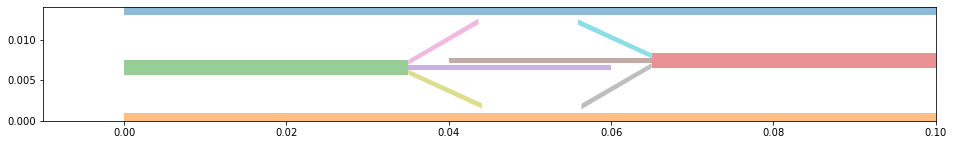

継ぎ手長さ：0.02，　cfrp間距離-0.001，　ディス：0.005，　斜め長さ：0.015，　幅：0.333


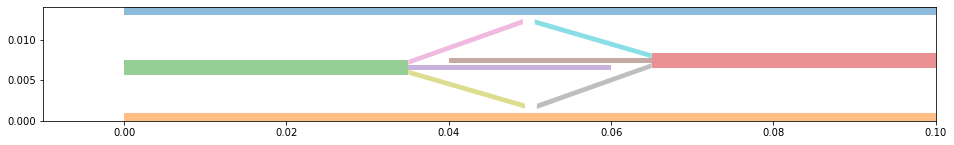

継ぎ手長さ：0.02，　cfrp間距離-0.001，　ディス：0.005，　斜め長さ：0.02，　幅：0.333


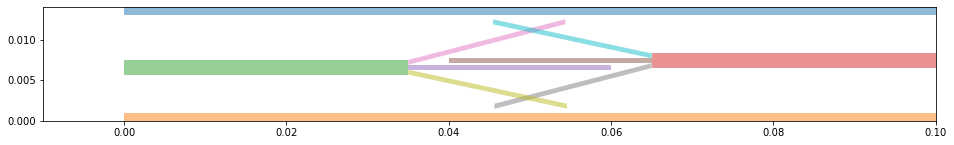

継ぎ手長さ：0.02，　cfrp間距離-0.001，　ディス：0.01，　斜め長さ：0.01，　幅：0.333


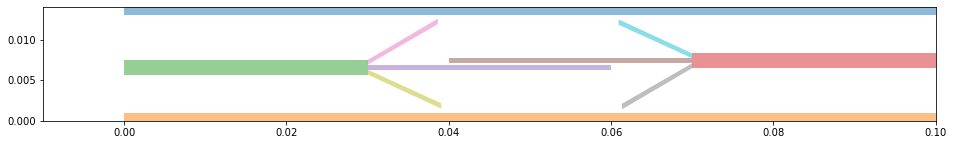

継ぎ手長さ：0.02，　cfrp間距離-0.001，　ディス：0.01，　斜め長さ：0.015，　幅：0.333


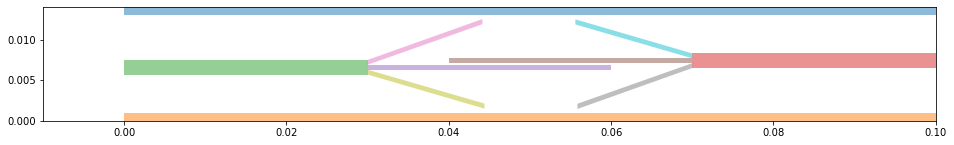

継ぎ手長さ：0.02，　cfrp間距離-0.001，　ディス：0.01，　斜め長さ：0.02，　幅：0.333


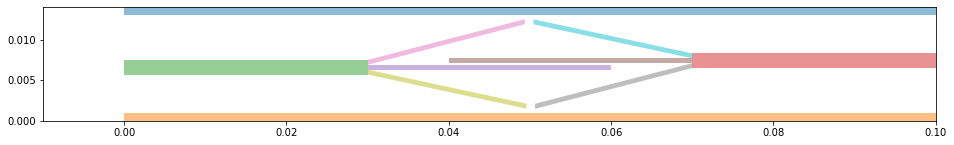

継ぎ手長さ：0.02，　cfrp間距離-0.001，　ディス：0.015，　斜め長さ：0.01，　幅：0.333


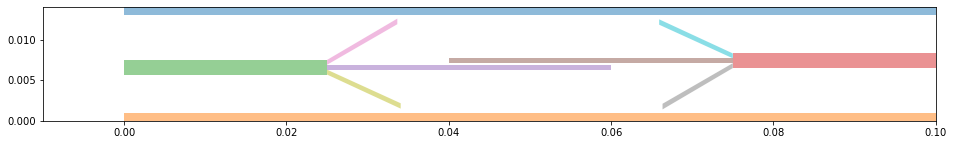

継ぎ手長さ：0.02，　cfrp間距離-0.001，　ディス：0.015，　斜め長さ：0.015，　幅：0.333


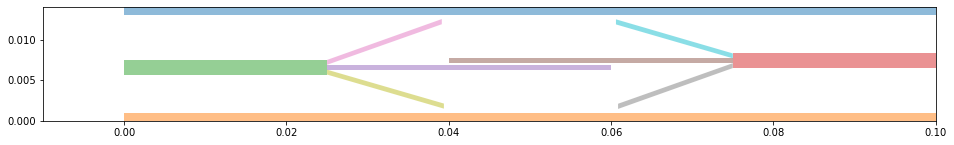

継ぎ手長さ：0.02，　cfrp間距離-0.001，　ディス：0.015，　斜め長さ：0.02，　幅：0.333


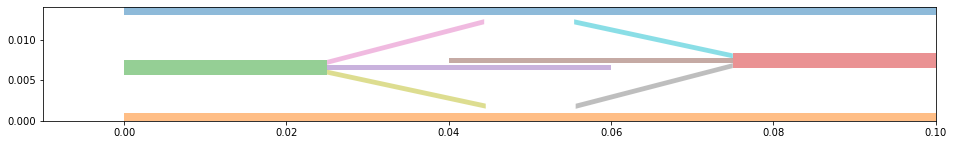

継ぎ手長さ：0.02，　cfrp間距離0，　ディス：0.005，　斜め長さ：0.01，　幅：0.333


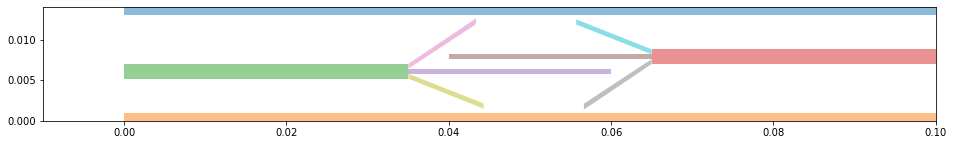

継ぎ手長さ：0.02，　cfrp間距離0，　ディス：0.005，　斜め長さ：0.015，　幅：0.333


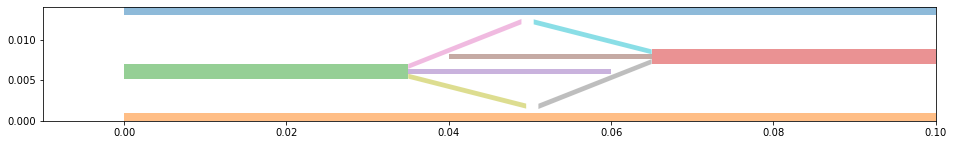

継ぎ手長さ：0.02，　cfrp間距離0，　ディス：0.005，　斜め長さ：0.02，　幅：0.333


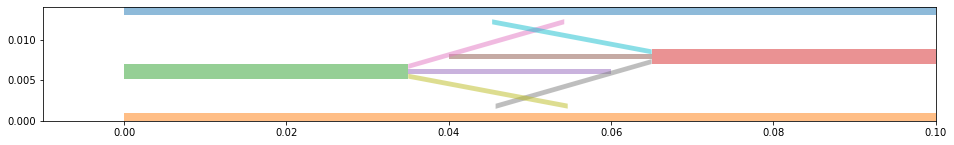

継ぎ手長さ：0.02，　cfrp間距離0，　ディス：0.01，　斜め長さ：0.01，　幅：0.333


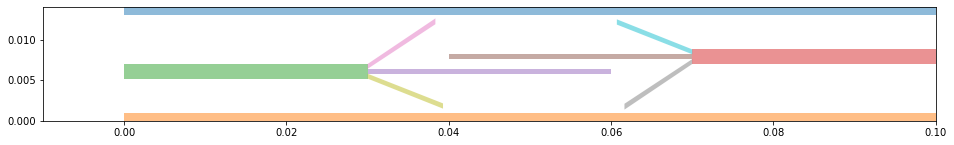

継ぎ手長さ：0.02，　cfrp間距離0，　ディス：0.01，　斜め長さ：0.015，　幅：0.333


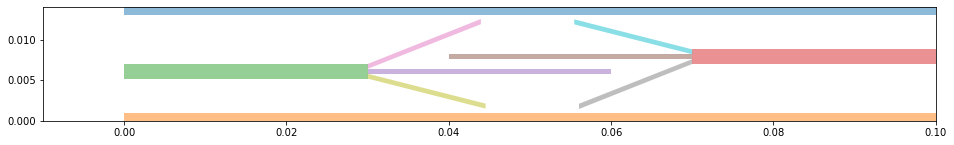

継ぎ手長さ：0.02，　cfrp間距離0，　ディス：0.01，　斜め長さ：0.02，　幅：0.333


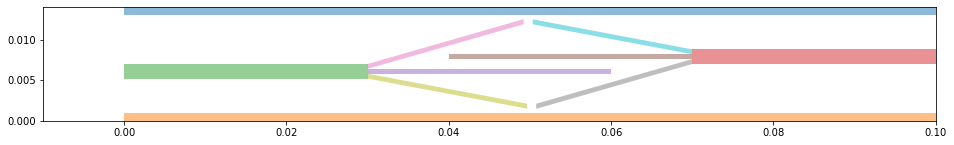

継ぎ手長さ：0.02，　cfrp間距離0，　ディス：0.015，　斜め長さ：0.01，　幅：0.333


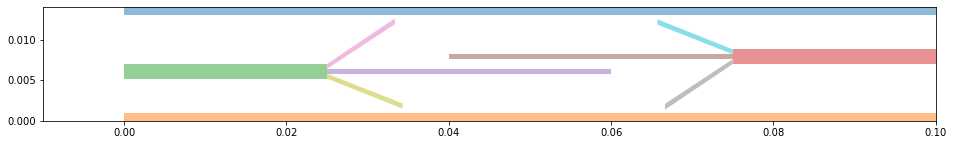

継ぎ手長さ：0.02，　cfrp間距離0，　ディス：0.015，　斜め長さ：0.015，　幅：0.333


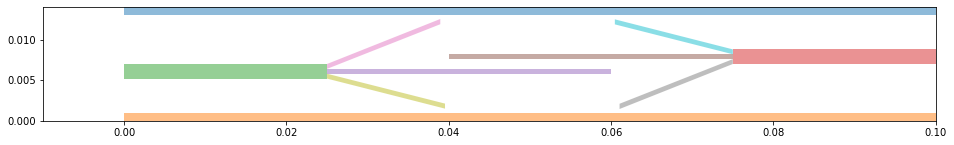

継ぎ手長さ：0.02，　cfrp間距離0，　ディス：0.015，　斜め長さ：0.02，　幅：0.333


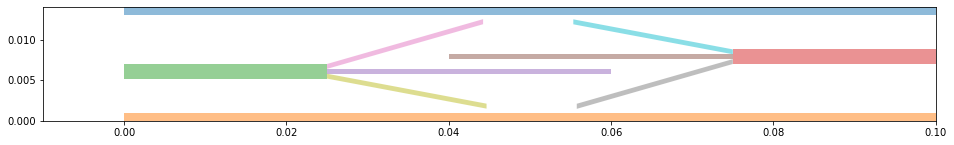

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.005，　斜め長さ：0.01，　幅：0.333


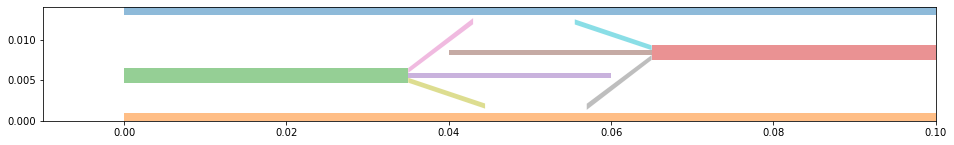

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.005，　斜め長さ：0.015，　幅：0.333


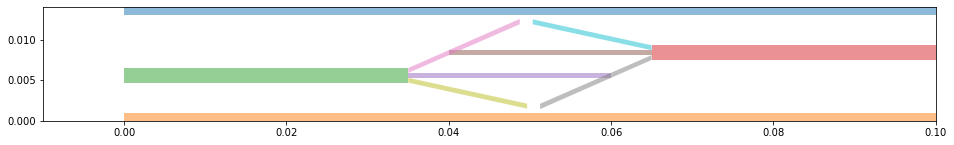

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.005，　斜め長さ：0.02，　幅：0.333


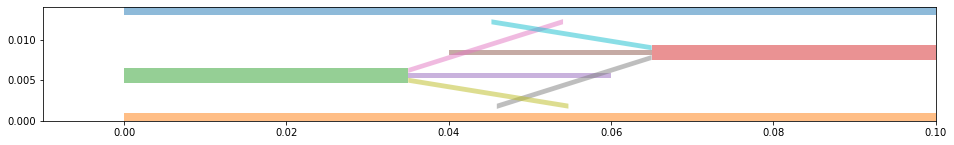

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.01，　幅：0.333


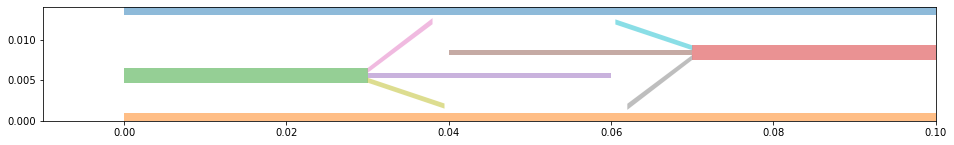

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.015，　幅：0.333


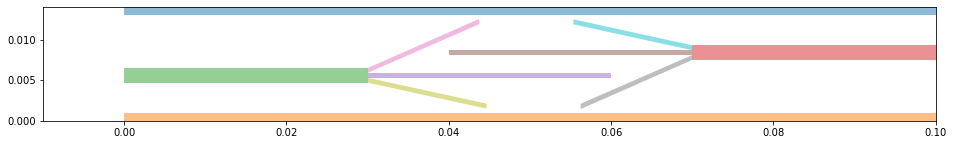

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.01，　斜め長さ：0.02，　幅：0.333


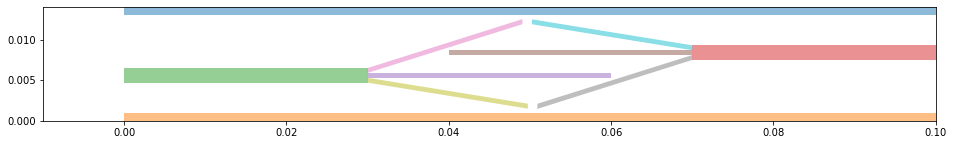

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.015，　斜め長さ：0.01，　幅：0.333


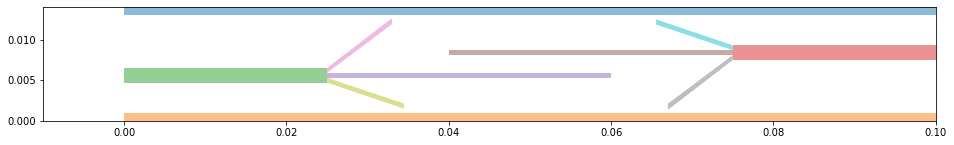

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.015，　斜め長さ：0.015，　幅：0.333


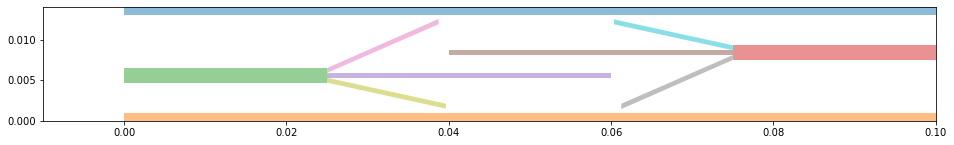

継ぎ手長さ：0.02，　cfrp間距離0.001，　ディス：0.015，　斜め長さ：0.02，　幅：0.333


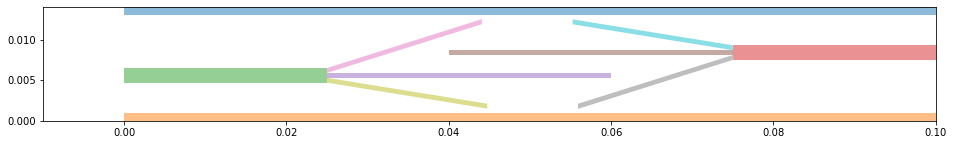

In [231]:
lap_list = [20E-3]
gap_list = [-1E-3, 0, 1E-3]
dis_list = [5E-3, 10E-3, 15E-3]
naname_list = [10E-3, 15E-3, 20E-3]
haba_list = [0.333]

for lap in lap_list:
    for gap in gap_list:
        for dis in dis_list:
            for naname in naname_list:
                for haba in haba_list:
                    
                    print("継ぎ手長さ：{}，　cfrp間距離{}，　ディス：{}，　斜め長さ：{}，　幅：{}".format(lap, gap, dis, naname, haba))
                    
                    fig = plt.figure(figsize=(16, 8))

                    ax = fig.add_subplot(111)
                    ax.set_xlim(-0.01, X1)
                    ax.set_ylim(0, P_y)

                    plt.gca().set_aspect('equal', adjustable='box')



                    X1 = 100E-3 # 試験片長さ
                    # Y1	=	25E-3
                    Z1 = 5E-3
                    P_y = 14E-3 # PLAのy幅

                    E_y = 12E-3 # Epoxyのy幅
                    E_z = 3E-3 # Epoxyのz幅

                    CF_lap = lap # CFRPの重ね継ぎ手長さ
                    CF_len = (X1 + CF_lap) / 2 # CFRP1本あたりの長さ
                    CF_y = 1.8E-3 # CFRPの高さ
                    CF_z = CF_y # CFRPの幅
                    CF_gap = gap # CFRP間の距離
                    Y4 = P_y/2 - CF_gap/2 - CF_z #CFRP1の初期位置
                    Y5 = P_y/2 + CF_gap/2 #CFRP2の初期位置


                    ch_dis = dis # cfrpが細くなってから継ぎ手部分を差し引いた距離
                    L_naname = naname # cfrpの斜め繊維の長さ
                    alpha = 0.5E-3 # plaと斜め繊維先端のy方向距離
                    X_hoso_fir = CF_len - CF_lap - ch_dis # 細いcfrpのx座標
                    H_cf_hoso = CF_y * haba #. 細いcfrpの幅
                    H_cf_naname = (CF_y-H_cf_hoso)/2 # 斜め方向cfrpの幅
                    # cfrp斜め繊維1つ目
                    sita1 = math.asin((((P_y+E_y)/2-(Y4+CF_y))-alpha)/L_naname)
                    X_naname_top1 = L_naname * math.cos(sita1) + X_hoso_fir
                    Y_naname_top1 = L_naname * math.sin(sita1) + Y4+H_cf_naname+H_cf_hoso
                    # cfrp斜め繊維２つ目
                    sita2 = math.asin((Y4-(P_y-E_y)/2-alpha)/L_naname)
                    X_naname_top2 = L_naname * math.cos(sita2) + X_hoso_fir
                    Y_naname_top2 = Y4 - L_naname * math.sin(sita2)



                    ## pla
                    x_pla = [0, 0, X1, X1]
                    y_pla = [(P_y+E_y)/2, P_y, P_y, (P_y+E_y)/2]
                    ##

                    x_cfrp = [0, 0, X_hoso_fir, X_hoso_fir]
                    y_cfrp= [Y4, Y4+CF_y, Y4+CF_y, Y4]

                    x_cfrp_hoso = [X_hoso_fir, X_hoso_fir, CF_len, CF_len]
                    y_cfrp_hoso= [Y4+H_cf_naname, Y4+H_cf_naname+H_cf_hoso, Y4+H_cf_naname+H_cf_hoso, Y4+H_cf_naname]

                    x_cfrp_naname1 = [X_hoso_fir, X_hoso_fir, X_naname_top1, X_naname_top1]
                    y_cfrp_naname1= [Y4+H_cf_naname+H_cf_hoso, Y4+CF_y, Y_naname_top1+H_cf_naname/math.cos(sita1), Y_naname_top1]

                    x_cfrp_naname2 = [X_hoso_fir, X_hoso_fir, X_naname_top2, X_naname_top2]
                    y_cfrp_naname2= [Y4, Y4+H_cf_naname, Y_naname_top2+H_cf_naname/math.cos(sita2), Y_naname_top2]

                    # print(math.sqrt((X_naname_top1-X_hoso_fir)**2+(Y_naname_top1+H_cf_naname/math.cos(sita1)-(Y4+CF_y))**2))
                    # print(math.sqrt((X_naname_top2-X_hoso_fir)**2+(Y_naname_top2+H_cf_naname/math.cos(sita2)-(Y4+H_cf_naname))**2))

                    x_list_list = [x_pla, x_cfrp, x_cfrp_hoso, x_cfrp_naname1, x_cfrp_naname2]
                    y_list_list = [y_pla, y_cfrp, y_cfrp_hoso, y_cfrp_naname1, y_cfrp_naname2]


                    plot_fill(ax, x_list_list, y_list_list)